In [1]:
from qtpg.team import Team
from qtpg.learner import Learner
from qtpg.program import Program
from qtpg.rule import Rule
from qtpg.figure13 import Figure13
from qtpg.figure13_hole_in_wall import Figure13HoleInWall
from qtpg.figure12 import Figure12
from qtpg.figure9 import Figure9
from qtpg.figureRandom import FigureRandom
from qtpg.figureHeywood import FigureHeywood
from qtpg.search_manager import SearchManager
from qtpg.results_manager import ResultsManager
import numpy as np
import uuid
import copy
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
# env params
memorySize = 40
legalMove = 0.1
illegalMove = -0.01
outOfBounds = 0.0
memoryRepeat = -0.01
goalReached = 100

# envName = 'Figure 13 no reinforcements'
# env = Figure13(5, 5, (2, 4), (0, 0), memorySize, 0.1, -0.01, 0.0, -0.01, 0.1)
# envName = 'Figure 13'
# env = Figure13(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 13 Hole in Wall'
# env = Figure13HoleInWall(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 12'
# env = Figure12(5, 5, (4, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 9'
# env = Figure9(10, 10, (4, 9), (0, 3), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Heywood'
# env = FigureHeywood(10, 10, (4, 4), (0, 4), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Random'
env = FigureRandom(20, 20, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# env.shake(0.2)

In [3]:
# envName = ''
plotName = '505015'
envName = '50x50#1sg#5'
save = False
load = True
numGens = 200
maxTeamPool = 5
runs = 30
# 20x20 #1
# start-goal #1 for 20x20 #1 --> default load
if envName == '20x20#1sg#1':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51')
# start-goal #2 for 20x20 #1
elif envName == '20x20#1sg#2':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (15, 15)
    env.current_state = env.start_state
    env.win_state = (3, 8)
    env.display()
# start-goal #3 for 20x20 #2
elif envName == '20x20#1sg#3':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (12, 19)
    env.current_state = env.start_state
    env.win_state = (9, 13)
    env.display()
elif envName == '20x20#1sg#4':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (15, 17)
    env.current_state = env.start_state
    env.win_state = (0, 15)
    env.display()
elif envName == '20x20#1sg#5':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (15, 11)
    env.current_state = env.start_state
    env.win_state = (10, 7)
    env.display()
elif envName == '20x20#2sg#1':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301')
elif envName == '20x20#2sg#2':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (10, 2)
    env.current_state = env.start_state
    env.win_state = (6, 18)
    env.display()
elif envName == '20x20#2sg#3':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (0, 15)
    env.current_state = env.start_state
    env.win_state = (14, 0)
    env.display()
elif envName == '20x20#2sg#4':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (9, 4)
    env.current_state = env.start_state
    env.win_state = (15, 0)
    env.display()
elif envName == '20x20#2sg#5':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (14, 16)
    env.current_state = env.start_state
    env.win_state = (8, 5)
    env.display()
elif envName == '20x20#3sg#1':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f')
elif envName == '20x20#3sg#2':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (7, 9)
    env.current_state = env.start_state
    env.win_state = (17, 10)
    env.display()
elif envName == '20x20#3sg#3':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (3, 2)
    env.current_state = env.start_state
    env.win_state = (0, 14)
    env.display()
elif envName == '20x20#3sg#4':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (0, 13)
    env.current_state = env.start_state
    env.win_state = (15, 18)
    env.display()
elif envName == '20x20#3sg#5':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (1, 8)
    env.current_state = env.start_state
    env.win_state = (3, 14)
    env.display()
# 50x50s
elif envName == '50x50#1sg#1':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694')
elif envName == '50x50#1sg#2':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (16, 46)
    env.current_state = env.start_state
    env.win_state = (20, 1)
    env.display()
elif envName == '50x50#1sg#3':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (3, 12)
    env.current_state = env.start_state
    env.win_state = (14, 43)
    env.display()
elif envName == '50x50#1sg#4':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (37, 17)
    env.current_state = env.start_state
    env.win_state = (20, 46)
    env.display()
elif envName == '50x50#1sg#5':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (20, 11)
    env.current_state = env.start_state
    env.win_state = (42, 25)
    env.display()

Loading env...
Env loaded successfully!
Rows: 50
Columns: 50
Start State: (20, 11)
Win State: (42, 25)
Illegal States: [(13, 27), (30, 11), (43, 19), (36, 30), (11, 14), (25, 35), (2, 29), (36, 45), (39, 34), (27, 44), (1, 42), (16, 30), (34, 16), (10, 3), (1, 35), (18, 32), (28, 15), (2, 34), (20, 3), (0, 0), (11, 43), (23, 11), (49, 12), (32, 28), (32, 45), (25, 12), (28, 17), (22, 34), (6, 30), (17, 33), (40, 20), (42, 3), (12, 42), (7, 44), (13, 29), (48, 13), (27, 28), (32, 17), (1, 22), (19, 18), (8, 17), (0, 8), (49, 39), (31, 4), (21, 18), (29, 30), (29, 18), (30, 16), (32, 24), (41, 16), (14, 42), (29, 8), (48, 20), (45, 36), (9, 31), (20, 16), (36, 43), (7, 17), (5, 27), (17, 13), (3, 15), (8, 21), (41, 5), (39, 22), (22, 16), (24, 22), (14, 1), (5, 49), (38, 1), (40, 22), (5, 20), (38, 49), (41, 46), (48, 37), (31, 7), (30, 0), (41, 41), (49, 47), (15, 43), (37, 32), (44, 7), (1, 6), (24, 33), (18, 17), (46, 2), (9, 6), (38, 27), (19, 8), (29, 36), (43, 38), (8, 19), (13, 2)

_ _ _ _ X _ _ X X _ _ X _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X _ X _ _ _ _ X _ _ _ X _ _ _ _ _ _ _ _ _ 

X _ _ _ _ _ _ X _ X _ X _ _ X X X _ _ X _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X _ _ X X _ X _ _ X _ _ 

_ X _ _ _ X _ X X _ _ _ _ X _ X _ X X _ _ _ _ _ X _ _ _ _ X X _ X X _ X X _ _ _ _ _ _ _ X _ _ _ _ _ 

X _ _ _ _ _ _ _ _ _ _ _ _ _ _ X _ X X X _ _ _ _ _ _ _ _ _ _ X _ _ _ _ _ _ _ _ _ _ _ X _ _ _ _ _ _ _ 

_ X X _ _ _ _ _ _ _ _ _ _ X X _ X _ X _ _ _ X _ X _ _ _ X _ _ _ _ X X _ _ _ _ _ _ X _ _ X _ X _ _ X 

_ _ _ X X _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ X _ _ _ _ _ X X X X _ _ X _ _ _ _ _ X _ _ _ _ _ _ _ _ _ 

_ X _ _ _ _ _ _ _ _ _ _ X _ X _ _ X X _ _ _ X _ _ _ _ _ _ _ _ _ X _ _ X _ _ _ _ _ _ _ _ _ _ _ _ X _ 

_ _ _ _ X _ _ _ _ _ X X _ _ _ _ _ X _ X _ _ X _ _ X _ _ _ _ _ _ _ X _ X _ X _ _ _ _ X _ _ _ _ X _ _ 

_ _ _ _ _ _ _ _ _ _ _ X _ _ _ _ _ X _ _ _ X _ _ _ X X _ _ _ _ X X X _ X X _ _ _ X _ X _ X X X _ X _ 

X _ _ _ _ _ _ _ _ _ _ _ X _ _ _ X _ _ _ _ _ _ X _ _ _ _ _ _ _ _ _ X X _ X _ _ _ _ 

In [4]:
if load == True:
    runs = 30
    resultsManager = ResultsManager()
    run_winners, loadedQueryTotals, win_loss = resultsManager.load_champions(envName)
    print(loadedQueryTotals)
    run_count = 0
    for run in range(runs):
        if (run_count >= len(run_winners)):
            run_winners.append({'run': run_count, 'winners': []})
        elif run_winners[run]['run'] != run_count:
            run_winners.insert(run_count, {'run': run_count, 'winners': []})
        run_count += 1
    for run in run_winners:
    #     print(run)
        for champ in run['winners']:
            print(champ.id)
else:
    print('not loading!')

Loading champions...
<class 'float'>
[0, 20, 5, 12]
0.8799999999999999
region index type: <class 'int'>
<class 'float'>
[1, 4, 13, 13]
1.2500000000000002
region index type: <class 'int'>
<class 'float'>
[1, 4, 15, 23]
1.2500000000000002
region index type: <class 'int'>
<class 'float'>
[0, 14, 5, 7]
0.56
region index type: <class 'int'>
<class 'float'>
[1, 4, 13, 20]
1.7700000000000005
region index type: <class 'int'>
<class 'float'>
[1, 4, 22, 23]
1.7700000000000005
region index type: <class 'int'>
<class 'float'>
[0, 21, 5, 5]
0.08
region index type: <class 'int'>
<class 'float'>
[1, 4, 13, 18]
1.1
region index type: <class 'int'>
<class 'float'>
[1, 4, 20, 23]
1.1
region index type: <class 'int'>
<class 'float'>
[0, 19, 0, 1]
0.38
region index type: <class 'int'>
<class 'float'>
[0, 19, 3, 4]
0.38
region index type: <class 'int'>
<class 'float'>
[1, 2, 18, 24]
0.8699999999999999
region index type: <class 'int'>
<class 'float'>
[1, 2, 26, 26]
0.8699999999999999
region index type: <cla

<class 'float'>
[0, 19, 19, 24]
0.8799999999999999
region index type: <class 'int'>
<class 'float'>
[0, 19, 26, 27]
0.8799999999999999
region index type: <class 'int'>
<class 'float'>
[1, 25, 11, 16]
0.9799999999999999
region index type: <class 'int'>
<class 'float'>
[1, 25, 18, 20]
0.9799999999999999
region index type: <class 'int'>
<class 'float'>
[0, 17, 24, 25]
0.4600000000000001
region index type: <class 'int'>
<class 'float'>
[0, 17, 27, 27]
0.4600000000000001
region index type: <class 'int'>
<class 'float'>
[1, 26, 4, 16]
1.6500000000000006
region index type: <class 'int'>
<class 'float'>
[1, 26, 18, 19]
1.6500000000000006
region index type: <class 'int'>
<class 'float'>
[0, 17, 25, 27]
0.37
region index type: <class 'int'>
<class 'float'>
[1, 24, 15, 21]
1.9000000000000006
region index type: <class 'int'>
<class 'float'>
[1, 24, 23, 26]
1.9000000000000006
region index type: <class 'int'>
<class 'float'>
[0, 22, 24, 31]
1.5100000000000002
region index type: <class 'int'>
<class 

<class 'float'>
[0, 30, 22, 37]
2.310000000000001
region index type: <class 'int'>
<class 'float'>
[1, 21, 24, 30]
1.23
region index type: <class 'int'>
<class 'float'>
[0, 31, 12, 23]
2.410000000000001
region index type: <class 'int'>
<class 'float'>
[0, 31, 25, 28]
2.410000000000001
region index type: <class 'int'>
<class 'float'>
[1, 24, 31, 31]
0.17
region index type: <class 'int'>
<class 'float'>
[0, 30, 20, 30]
2.8700000000000006
region index type: <class 'int'>
<class 'float'>
[0, 30, 32, 37]
2.8700000000000006
region index type: <class 'int'>
<class 'float'>
[1, 31, 27, 29]
0.28
region index type: <class 'int'>
<class 'float'>
[0, 30, 20, 36]
2.6700000000000013
region index type: <class 'int'>
<class 'float'>
[1, 37, 25, 29]
1.4400000000000002
region index type: <class 'int'>
<class 'float'>
[1, 37, 31, 35]
1.4400000000000002
region index type: <class 'int'>
<class 'float'>
[0, 30, 20, 22]
3.219999999999999
region index type: <class 'int'>
<class 'float'>
[0, 30, 24, 37]
3.2199

<class 'float'>
[1, 13, 30, 43]
1.8500000000000008
region index type: <class 'int'>
<class 'float'>
[1, 13, 45, 46]
1.8500000000000008
region index type: <class 'int'>
<class 'float'>
[0, 44, 11, 18]
0.9699999999999999
region index type: <class 'int'>
<class 'float'>
[1, 19, 44, 44]
0.36000000000000004
region index type: <class 'int'>
<class 'float'>
[1, 19, 46, 46]
0.36000000000000004
region index type: <class 'int'>
<class 'float'>
[0, 45, 5, 27]
3.5500000000000003
region index type: <class 'int'>
<class 'float'>
[1, 28, 45, 45]
0.28
region index type: <class 'int'>
<class 'float'>
[1, 28, 47, 48]
0.28
region index type: <class 'int'>
<class 'float'>
[0, 46, 7, 20]
2.4600000000000013
region index type: <class 'int'>
<class 'float'>
[0, 46, 22, 30]
2.4600000000000013
region index type: <class 'int'>
<class 'float'>
[1, 21, 33, 37]
2.55
region index type: <class 'int'>
<class 'float'>
[1, 21, 39, 47]
2.55
region index type: <class 'int'>
<class 'float'>
[0, 38, 18, 21]
1.24
region inde

2.0900000000000007
region index type: <class 'int'>
<class 'float'>
[1, 23, 44, 49]
2.0900000000000007
region index type: <class 'int'>
<class 'float'>
[0, 43, 21, 22]
0.37
region index type: <class 'int'>
<class 'float'>
[1, 23, 38, 39]
1.5300000000000002
region index type: <class 'int'>
<class 'float'>
[1, 23, 41, 49]
1.5300000000000002
region index type: <class 'int'>
<class 'float'>
[0, 40, 24, 30]
0.6799999999999999
region index type: <class 'int'>
<class 'float'>
[1, 23, 38, 42]
1.9100000000000006
region index type: <class 'int'>
<class 'float'>
[1, 23, 44, 49]
1.9100000000000006
region index type: <class 'int'>
<class 'float'>
[0, 43, 22, 23]
0.18
region index type: <class 'int'>
<class 'float'>
[1, 21, 33, 33]
2.2900000000000005
region index type: <class 'int'>
<class 'float'>
[1, 21, 35, 47]
2.2900000000000005
region index type: <class 'int'>
<class 'float'>
[0, 34, 17, 18]
3.4299999999999997
region index type: <class 'int'>
<class 'float'>
[0, 34, 20, 37]
3.4299999999999997
r

<class 'float'>
[1, 35, 35, 35]
0.85
region index type: <class 'int'>
<class 'float'>
[0, 34, 17, 26]
3.4099999999999984
region index type: <class 'int'>
<class 'float'>
[0, 34, 28, 37]
3.4099999999999984
region index type: <class 'int'>
<class 'float'>
[1, 27, 22, 30]
1.7500000000000007
region index type: <class 'int'>
<class 'float'>
[1, 27, 32, 37]
1.7500000000000007
region index type: <class 'int'>
<class 'float'>
[0, 31, 12, 18]
1.6700000000000004
region index type: <class 'int'>
<class 'float'>
[0, 31, 20, 28]
1.6700000000000004
region index type: <class 'int'>
<class 'float'>
[1, 19, 31, 39]
0.8799999999999999
region index type: <class 'int'>
<class 'float'>
[0, 40, 7, 11]
2.2700000000000005
region index type: <class 'int'>
<class 'float'>
[0, 40, 13, 19]
2.2700000000000005
region index type: <class 'int'>
<class 'float'>
[1, 12, 40, 44]
1.5100000000000002
region index type: <class 'int'>
<class 'float'>
[1, 12, 46, 48]
1.5100000000000002
region index type: <class 'int'>
<class 

<class 'float'>
[1, 9, 47, 49]
1.8200000000000005
region index type: <class 'int'>
<class 'float'>
[0, 46, 7, 22]
4.179999999999997
region index type: <class 'int'>
<class 'float'>
[0, 46, 24, 30]
4.179999999999997
region index type: <class 'int'>
<class 'float'>
[1, 23, 38, 40]
1.8000000000000005
region index type: <class 'int'>
<class 'float'>
[1, 23, 42, 49]
1.8000000000000005
region index type: <class 'int'>
<class 'float'>
[0, 41, 20, 20]
0.87
region index type: <class 'int'>
<class 'float'>
[0, 41, 22, 26]
0.87
region index type: <class 'int'>
<class 'float'>
[1, 21, 33, 36]
2.1100000000000008
region index type: <class 'int'>
<class 'float'>
[1, 21, 38, 47]
2.1100000000000008
region index type: <class 'int'>
<class 'float'>
[0, 37, 16, 21]
1.0399999999999998
region index type: <class 'int'>
<class 'float'>
[1, 22, 34, 38]
0.85
region index type: <class 'int'>
<class 'float'>
[0, 33, 16, 24]
1.8300000000000005
region index type: <class 'int'>
<class 'float'>
[0, 33, 26, 29]
1.8300

<class 'float'>
[1, 4, 18, 23]
0.97
region index type: <class 'int'>
<class 'float'>
[0, 17, 4, 4]
0.08
region index type: <class 'int'>
<class 'float'>
[1, 3, 17, 17]
0.18
region index type: <class 'int'>
<class 'float'>
[1, 3, 19, 19]
0.18
region index type: <class 'int'>
<class 'float'>
[0, 18, 1, 4]
0.65
region index type: <class 'int'>
<class 'float'>
[1, 0, 13, 21]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 12, 0, 0]
0.17
region index type: <class 'int'>
<class 'float'>
[1, 1, 9, 11]
0.47
region index type: <class 'int'>
<class 'float'>
[1, 1, 13, 13]
0.47
region index type: <class 'int'>
<class 'float'>
[0, 12, 1, 1]
0.17000000000000004
region index type: <class 'int'>
<class 'float'>
[1, 0, 13, 21]
0.79
region index type: <class 'int'>
<class 'float'>
[0, 12, 1, 1]
0.08000000000000002
region index type: <class 'int'>
<class 'float'>
[1, 0, 12, 18]
0.79
region index type: <class 'int'>
<class 'float'>
[1, 0, 20, 21]
0.79
region index type: <class 'in

<class 'float'>
[0, 22, 5, 11]
1.7900000000000005
region index type: <class 'int'>
<class 'float'>
[1, 4, 13, 20]
1.7800000000000005
region index type: <class 'int'>
<class 'float'>
[1, 4, 22, 23]
1.7800000000000005
region index type: <class 'int'>
<class 'float'>
[0, 21, 4, 4]
0.08
region index type: <class 'int'>
<class 'float'>
[1, 5, 20, 27]
1.33
region index type: <class 'int'>
<class 'float'>
[0, 28, 1, 3]
1.6400000000000006
region index type: <class 'int'>
<class 'float'>
[0, 28, 5, 14]
1.6400000000000006
region index type: <class 'int'>
<class 'float'>
[1, 4, 28, 30]
0.38
region index type: <class 'int'>
<class 'float'>
[0, 27, 3, 11]
1.6000000000000003
region index type: <class 'int'>
<class 'float'>
[1, 12, 26, 30]
0.85
region index type: <class 'int'>
<class 'float'>
[0, 31, 13, 28]
3.0299999999999994
region index type: <class 'int'>
<class 'float'>
[1, 12, 26, 30]
0.8899999999999999
region index type: <class 'int'>
<class 'float'>
[0, 31, 13, 28]
1.5800000000000003
region i

<class 'float'>
[0, 24, 2, 3]
0.37
region index type: <class 'int'>
<class 'float'>
[1, 1, 15, 21]
1.6800000000000004
region index type: <class 'int'>
<class 'float'>
[1, 1, 23, 24]
1.6800000000000004
region index type: <class 'int'>
<class 'float'>
[0, 22, 1, 3]
1.7900000000000005
region index type: <class 'int'>
<class 'float'>
[0, 22, 5, 11]
1.7900000000000005
region index type: <class 'int'>
<class 'float'>
[1, 4, 13, 20]
1.7800000000000005
region index type: <class 'int'>
<class 'float'>
[1, 4, 22, 23]
1.7800000000000005
region index type: <class 'int'>
<class 'float'>
[0, 21, 4, 4]
0.08
region index type: <class 'int'>
<class 'float'>
[1, 5, 20, 27]
1.33
region index type: <class 'int'>
<class 'float'>
[0, 28, 1, 3]
1.6400000000000006
region index type: <class 'int'>
<class 'float'>
[0, 28, 5, 14]
1.6400000000000006
region index type: <class 'int'>
<class 'float'>
[1, 4, 28, 30]
0.38
region index type: <class 'int'>
<class 'float'>
[0, 27, 3, 11]
1.6000000000000003
region index t

<class 'float'>
[1, 12, 26, 29]
0.48
region index type: <class 'int'>
<class 'float'>
[1, 12, 31, 31]
0.48
region index type: <class 'int'>
<class 'float'>
[0, 30, 12, 12]
0.17
region index type: <class 'int'>
<class 'float'>
[1, 13, 30, 38]
3.0299999999999994
region index type: <class 'int'>
<class 'float'>
[1, 13, 40, 46]
3.0299999999999994
region index type: <class 'int'>
<class 'float'>
[0, 39, 13, 20]
1.5100000000000002
region index type: <class 'int'>
<class 'float'>
[1, 21, 33, 45]
2.1000000000000005
region index type: <class 'int'>
<class 'float'>
[1, 21, 47, 47]
2.1000000000000005
region index type: <class 'int'>
<class 'float'>
[0, 46, 7, 22]
3.1000000000000014
region index type: <class 'int'>
<class 'float'>
[0, 46, 24, 30]
3.1000000000000014
region index type: <class 'int'>
<class 'float'>
[1, 23, 38, 39]
1.3700000000000003
region index type: <class 'int'>
<class 'float'>
[1, 23, 41, 49]
1.3700000000000003
region index type: <class 'int'>
<class 'float'>
[0, 40, 23, 23]
0.6

<class 'float'>
[0, 22, 28, 32]
1.33
region index type: <class 'int'>
<class 'float'>
[1, 27, 22, 27]
1.4800000000000002
region index type: <class 'int'>
<class 'float'>
[1, 27, 29, 37]
1.4800000000000002
region index type: <class 'int'>
<class 'float'>
[0, 28, 20, 21]
1.06
region index type: <class 'int'>
<class 'float'>
[0, 28, 23, 29]
1.06
region index type: <class 'int'>
<class 'float'>
[1, 22, 29, 31]
0.55
region index type: <class 'int'>
<class 'float'>
[0, 28, 21, 29]
1.5000000000000002
region index type: <class 'int'>
<class 'float'>
[1, 20, 13, 19]
3.53
region index type: <class 'int'>
<class 'float'>
[1, 20, 21, 35]
3.53
region index type: <class 'int'>
<class 'float'>
[0, 20, 20, 20]
0.18
region index type: <class 'int'>
<class 'float'>
[0, 20, 22, 22]
0.18
region index type: <class 'int'>
<class 'float'>
[1, 21, 11, 14]
1.26
region index type: <class 'int'>
<class 'float'>
[1, 21, 16, 22]
1.26
region index type: <class 'int'>
<class 'float'>
[0, 15, 16, 28]
3.70999999999999

<class 'float'>
[1, 20, 26, 35]
4.189999999999998
region index type: <class 'int'>
<class 'float'>
[0, 25, 19, 20]
0.27
region index type: <class 'int'>
<class 'float'>
[1, 21, 24, 29]
0.7799999999999999
region index type: <class 'int'>
<class 'float'>
[1, 21, 31, 31]
0.7799999999999999
region index type: <class 'int'>
<class 'float'>
[0, 30, 20, 26]
3.119999999999999
region index type: <class 'int'>
<class 'float'>
[0, 30, 28, 37]
3.119999999999999
region index type: <class 'int'>
<class 'float'>
[1, 27, 22, 26]
2.210000000000001
region index type: <class 'int'>
<class 'float'>
[1, 27, 28, 37]
2.210000000000001
region index type: <class 'int'>
<class 'float'>
[0, 27, 25, 25]
0.19
region index type: <class 'int'>
<class 'float'>
[0, 27, 27, 27]
0.19
region index type: <class 'int'>
<class 'float'>
[1, 26, 24, 30]
2.0000000000000004
region index type: <class 'int'>
<class 'float'>
[1, 26, 32, 36]
2.0000000000000004
region index type: <class 'int'>
<class 'float'>
[0, 31, 12, 27]
1.77000

<class 'float'>
[1, 21, 33, 44]
2.65
region index type: <class 'int'>
<class 'float'>
[1, 21, 46, 47]
2.65
region index type: <class 'int'>
<class 'float'>
[0, 45, 5, 13]
2.9300000000000015
region index type: <class 'int'>
<class 'float'>
[0, 45, 15, 28]
2.9300000000000015
region index type: <class 'int'>
<class 'float'>
[1, 14, 33, 44]
1.37
region index type: <class 'int'>
<class 'float'>
[1, 14, 46, 46]
1.37
region index type: <class 'int'>
<class 'float'>
[0, 45, 5, 5]
3.5400000000000005
region index type: <class 'int'>
<class 'float'>
[0, 45, 7, 28]
3.5400000000000005
region index type: <class 'int'>
<class 'float'>
[1, 6, 41, 41]
0.38
region index type: <class 'int'>
<class 'float'>
[1, 6, 43, 45]
0.38
region index type: <class 'int'>
<class 'float'>
[0, 42, 4, 14]
1.6600000000000006
region index type: <class 'int'>
<class 'float'>
[0, 42, 16, 19]
1.6600000000000006
region index type: <class 'int'>
<class 'float'>
[1, 15, 39, 40]
1.6200000000000003
region index type: <class 'int'>

<class 'float'>
[0, 26, 5, 19]
2.580000000000001
region index type: <class 'int'>
<class 'float'>
[0, 26, 21, 21]
2.580000000000001
region index type: <class 'int'>
<class 'float'>
[1, 20, 13, 33]
3.0100000000000016
region index type: <class 'int'>
<class 'float'>
[1, 20, 35, 35]
3.0100000000000016
region index type: <class 'int'>
<class 'float'>
[0, 34, 17, 26]
2.260000000000001
region index type: <class 'int'>
<class 'float'>
[0, 34, 28, 37]
2.260000000000001
region index type: <class 'int'>
<class 'float'>
[1, 27, 22, 27]
1.7600000000000007
region index type: <class 'int'>
<class 'float'>
[1, 27, 29, 37]
1.7600000000000007
region index type: <class 'int'>
<class 'float'>
[0, 28, 20, 24]
1.5200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 28, 26, 29]
1.5200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 25, 25, 42]
101.96
region index type: <class 'int'>
<class 'float'>
[0, 20, 4, 4]
1.4200000000000002
region index type: <class 'int'>
<class 'flo

[1, 27, 22, 32]
2.1100000000000008
region index type: <class 'int'>
<class 'float'>
[1, 27, 34, 37]
2.1100000000000008
region index type: <class 'int'>
<class 'float'>
[0, 33, 16, 27]
1.4600000000000004
region index type: <class 'int'>
<class 'float'>
[0, 33, 29, 29]
1.4600000000000004
region index type: <class 'int'>
<class 'float'>
[1, 28, 34, 36]
0.55
region index type: <class 'int'>
<class 'float'>
[0, 33, 16, 24]
2.2600000000000007
region index type: <class 'int'>
<class 'float'>
[0, 33, 26, 29]
2.2600000000000007
region index type: <class 'int'>
<class 'float'>
[1, 25, 33, 42]
100.82000000000001
region index type: <class 'int'>
<class 'float'>
[0, 20, 4, 11]
0.8799999999999999
region index type: <class 'int'>
<class 'float'>
[1, 12, 20, 21]
0.27
region index type: <class 'int'>
<class 'float'>
[0, 19, 11, 11]
0.07
region index type: <class 'int'>
<class 'float'>
[1, 12, 19, 19]
0.16000000000000003
region index type: <class 'int'>
<class 'float'>
[1, 12, 21, 21]
0.1600000000000000

<class 'float'>
[0, 26, 5, 19]
2.210000000000001
region index type: <class 'int'>
<class 'float'>
[0, 26, 21, 21]
2.210000000000001
region index type: <class 'int'>
<class 'float'>
[1, 20, 13, 30]
3.0000000000000013
region index type: <class 'int'>
<class 'float'>
[1, 20, 32, 35]
3.0000000000000013
region index type: <class 'int'>
<class 'float'>
[0, 31, 12, 24]
2.310000000000001
region index type: <class 'int'>
<class 'float'>
[0, 31, 26, 28]
2.310000000000001
region index type: <class 'int'>
<class 'float'>
[1, 25, 25, 42]
102.22999999999999
region index type: <class 'int'>
<class 'float'>
[0, 20, 4, 10]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 20, 12, 12]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 11, 15, 20]
1.13
region index type: <class 'int'>
<class 'float'>
[1, 11, 22, 22]
1.13
region index type: <class 'int'>
<class 'float'>
[0, 21, 10, 13]
0.56
region index type: <class 'int'>
<class 'float'>
[1, 9, 17, 27]
1.5400000

<class 'float'>
[1, 5, 20, 24]
1.5000000000000002
region index type: <class 'int'>
<class 'float'>
[1, 5, 26, 28]
1.5000000000000002
region index type: <class 'int'>
<class 'float'>
[0, 25, 2, 5]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 25, 7, 11]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 6, 22, 26]
2.7600000000000002
region index type: <class 'int'>
<class 'float'>
[1, 6, 28, 38]
2.7600000000000002
region index type: <class 'int'>
<class 'float'>
[0, 27, 4, 12]
1.1400000000000001
region index type: <class 'int'>
<class 'float'>
[1, 3, 28, 33]
0.59
region index type: <class 'int'>
<class 'float'>
[0, 27, 3, 10]
1.6100000000000003
region index type: <class 'int'>
<class 'float'>
[0, 27, 12, 12]
1.6100000000000003
region index type: <class 'int'>
<class 'float'>
[1, 11, 25, 26]
0.5700000000000001
region index type: <class 'int'>
<class 'float'>
[1, 11, 28, 29]
0.5700000000000001
region index type: <class 'int'>
<class 'float'>


<class 'float'>
[1, 36, 36, 36]
1.1300000000000001
region index type: <class 'int'>
<class 'float'>
[1, 36, 38, 44]
1.1300000000000001
region index type: <class 'int'>
<class 'float'>
[0, 37, 37, 38]
0.16000000000000003
region index type: <class 'int'>
<class 'float'>
[1, 36, 36, 37]
1.35
region index type: <class 'int'>
<class 'float'>
[1, 36, 39, 44]
1.35
region index type: <class 'int'>
<class 'float'>
[0, 38, 34, 34]
0.56
region index type: <class 'int'>
<class 'float'>
[0, 38, 36, 38]
0.56
region index type: <class 'int'>
<class 'float'>
[1, 35, 38, 39]
0.18
region index type: <class 'int'>
<class 'float'>
[0, 40, 32, 33]
0.65
region index type: <class 'int'>
<class 'float'>
[0, 40, 35, 36]
0.65
region index type: <class 'int'>
<class 'float'>
[1, 34, 41, 42]
0.17
region index type: <class 'int'>
<class 'float'>
[0, 40, 32, 35]
0.5200000000000001
region index type: <class 'int'>
<class 'float'>
[1, 36, 36, 43]
1.1300000000000001
region index type: <class 'int'>
<class 'float'>
[0,

region index type: <class 'int'>
<class 'float'>
[1, 17, 47, 49]
1.6100000000000003
region index type: <class 'int'>
<class 'float'>
[0, 46, 7, 13]
3.1900000000000017
region index type: <class 'int'>
<class 'float'>
[0, 46, 15, 30]
3.1900000000000017
region index type: <class 'int'>
<class 'float'>
[1, 14, 33, 42]
1.28
region index type: <class 'int'>
<class 'float'>
[1, 14, 44, 46]
1.28
region index type: <class 'int'>
<class 'float'>
[0, 43, 0, 3]
2.97
region index type: <class 'int'>
<class 'float'>
[0, 43, 5, 17]
2.97
region index type: <class 'int'>
<class 'float'>
[1, 4, 39, 42]
0.38
region index type: <class 'int'>
<class 'float'>
[0, 43, 0, 13]
2.8500000000000005
region index type: <class 'int'>
<class 'float'>
[0, 43, 15, 17]
2.8500000000000005
region index type: <class 'int'>
<class 'float'>
[1, 14, 33, 35]
2.1800000000000006
region index type: <class 'int'>
<class 'float'>
[1, 14, 37, 46]
2.1800000000000006
region index type: <class 'int'>
<class 'float'>
[0, 36, 0, 15]
3.16

<class 'float'>
[0, 46, 7, 11]
3.7199999999999998
region index type: <class 'int'>
<class 'float'>
[0, 46, 13, 30]
3.7199999999999998
region index type: <class 'int'>
<class 'float'>
[1, 12, 40, 44]
0.9699999999999999
region index type: <class 'int'>
<class 'float'>
[1, 12, 46, 48]
0.9699999999999999
region index type: <class 'int'>
<class 'float'>
[0, 45, 5, 14]
3.73
region index type: <class 'int'>
<class 'float'>
[0, 45, 16, 28]
3.73
region index type: <class 'int'>
<class 'float'>
[1, 15, 39, 44]
1.5300000000000002
region index type: <class 'int'>
<class 'float'>
[1, 15, 46, 49]
1.5300000000000002
region index type: <class 'int'>
<class 'float'>
[0, 45, 5, 6]
3.460000000000001
region index type: <class 'int'>
<class 'float'>
[0, 45, 8, 28]
3.460000000000001
region index type: <class 'int'>
<class 'float'>
[1, 7, 46, 49]
0.39
region index type: <class 'int'>
<class 'float'>
[0, 45, 5, 16]
2.4600000000000013
region index type: <class 'int'>
<class 'float'>
[0, 45, 18, 28]
2.460000000

<class 'float'>
[1, 35, 12, 13]
0.56
region index type: <class 'int'>
<class 'float'>
[1, 35, 15, 15]
0.56
region index type: <class 'int'>
<class 'float'>
[0, 14, 25, 35]
1.37
region index type: <class 'int'>
<class 'float'>
[0, 14, 37, 37]
1.37
region index type: <class 'int'>
<class 'float'>
[1, 36, 13, 14]
0.27
region index type: <class 'int'>
<class 'float'>
[0, 15, 16, 27]
2.3600000000000008
region index type: <class 'int'>
<class 'float'>
[0, 15, 29, 38]
2.3600000000000008
region index type: <class 'int'>
<class 'float'>
[1, 28, 0, 5]
2.8399999999999994
region index type: <class 'int'>
<class 'float'>
[1, 28, 7, 15]
2.8399999999999994
region index type: <class 'int'>
<class 'float'>
[0, 6, 21, 27]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 6, 29, 29]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 28, 0, 4]
2.0400000000000005
region index type: <class 'int'>
<class 'float'>
[1, 28, 6, 15]
2.0400000000000005
region index type: 

1.1600000000000001
region index type: <class 'int'>
<class 'float'>
[1, 23, 23, 33]
1.8900000000000006
region index type: <class 'int'>
<class 'float'>
[0, 34, 18, 37]
2.520000000000001
region index type: <class 'int'>
<class 'float'>
[1, 17, 33, 34]
0.65
region index type: <class 'int'>
<class 'float'>
[1, 17, 36, 37]
0.65
region index type: <class 'int'>
<class 'float'>
[0, 35, 17, 22]
0.6699999999999999
region index type: <class 'int'>
<class 'float'>
[1, 16, 35, 36]
0.48
region index type: <class 'int'>
<class 'float'>
[1, 16, 38, 40]
0.48
region index type: <class 'int'>
<class 'float'>
[0, 37, 16, 17]
1.1199999999999999
region index type: <class 'int'>
<class 'float'>
[0, 37, 19, 22]
1.1199999999999999
region index type: <class 'int'>
<class 'float'>
[1, 18, 30, 33]
1.2500000000000002
region index type: <class 'int'>
<class 'float'>
[1, 18, 35, 40]
1.2500000000000002
region index type: <class 'int'>
<class 'float'>
[0, 34, 18, 37]
3.6899999999999986
region index type: <class 'int

[1, 34, 9, 10]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 34, 12, 18]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 11, 31, 33]
0.28
region index type: <class 'int'>
<class 'float'>
[1, 34, 9, 14]
1.4400000000000002
region index type: <class 'int'>
<class 'float'>
[1, 34, 16, 18]
1.4400000000000002
region index type: <class 'int'>
<class 'float'>
[0, 15, 16, 24]
2.5400000000000014
region index type: <class 'int'>
<class 'float'>
[0, 15, 26, 38]
2.5400000000000014
region index type: <class 'int'>
<class 'float'>
[1, 25, 11, 16]
1.33
region index type: <class 'int'>
<class 'float'>
[1, 25, 18, 20]
1.33
region index type: <class 'int'>
<class 'float'>
[0, 17, 24, 25]
0.4600000000000001
region index type: <class 'int'>
<class 'float'>
[0, 17, 27, 27]
0.4600000000000001
region index type: <class 'int'>
<class 'float'>
[1, 26, 4, 14]
1.6600000000000006
region index type: <class 'int'>
<class 'float'>
[1, 26, 16, 19]
1.6600000000000006
re

[0, 46, 23, 30]
4.269999999999997
region index type: <class 'int'>
<class 'float'>
[1, 22, 41, 41]
1.24
region index type: <class 'int'>
<class 'float'>
[1, 22, 43, 49]
1.24
region index type: <class 'int'>
<class 'float'>
[0, 42, 22, 25]
100.29
region index type: <class 'int'>
<class 'float'>
[0, 20, 4, 4]
0.8799999999999999
region index type: <class 'int'>
<class 'float'>
[0, 20, 6, 12]
0.8799999999999999
region index type: <class 'int'>
<class 'float'>
[1, 5, 20, 26]
0.7799999999999999
region index type: <class 'int'>
<class 'float'>
[1, 5, 28, 28]
0.7799999999999999
region index type: <class 'int'>
<class 'float'>
[0, 27, 3, 6]
1.06
region index type: <class 'int'>
<class 'float'>
[0, 27, 8, 12]
1.06
region index type: <class 'int'>
<class 'float'>
[1, 7, 22, 22]
1.0299999999999998
region index type: <class 'int'>
<class 'float'>
[1, 7, 24, 28]
1.0299999999999998
region index type: <class 'int'>
<class 'float'>
[0, 23, 0, 9]
1.2400000000000002
region index type: <class 'int'>
<clas

<class 'float'>
[1, 11, 0, 6]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 11, 8, 8]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 7, 0, 8]
2.580000000000001
region index type: <class 'int'>
<class 'float'>
[0, 7, 10, 16]
2.580000000000001
region index type: <class 'int'>
<class 'float'>
[1, 9, 5, 9]
1.7000000000000004
region index type: <class 'int'>
<class 'float'>
[1, 9, 11, 15]
1.7000000000000004
region index type: <class 'int'>
<class 'float'>
[0, 10, 4, 10]
1.4300000000000004
region index type: <class 'int'>
<class 'float'>
[0, 10, 12, 14]
1.4300000000000004
region index type: <class 'int'>
<class 'float'>
[1, 11, 10, 11]
0.29000000000000004
region index type: <class 'int'>
<class 'float'>
[1, 11, 13, 13]
0.29000000000000004
region index type: <class 'int'>
<class 'float'>
[0, 12, 5, 8]
1.9200000000000006
region index type: <class 'int'>
<class 'float'>
[0, 12, 10, 18]
1.9200000000000006
region index type: <class 'int'>
<class 

<class 'float'>
[0, 28, 10, 14]
1.4700000000000002
region index type: <class 'int'>
<class 'float'>
[1, 9, 17, 28]
2.170000000000001
region index type: <class 'int'>
<class 'float'>
[0, 29, 9, 11]
0.54
region index type: <class 'int'>
<class 'float'>
[1, 12, 26, 27]
0.75
region index type: <class 'int'>
<class 'float'>
[1, 12, 29, 31]
0.75
region index type: <class 'int'>
<class 'float'>
[0, 28, 1, 8]
2.270000000000001
region index type: <class 'int'>
<class 'float'>
[0, 28, 10, 14]
2.270000000000001
region index type: <class 'int'>
<class 'float'>
[1, 9, 17, 25]
1.28
region index type: <class 'int'>
<class 'float'>
[1, 9, 27, 29]
1.28
region index type: <class 'int'>
<class 'float'>
[0, 26, 5, 19]
2.650000000000001
region index type: <class 'int'>
<class 'float'>
[0, 26, 21, 21]
2.650000000000001
region index type: <class 'int'>
<class 'float'>
[1, 20, 13, 20]
3.0000000000000013
region index type: <class 'int'>
<class 'float'>
[1, 20, 22, 35]
3.0000000000000013
region index type: <cla

<class 'float'>
[1, 9, 44, 49]
1.8200000000000005
region index type: <class 'int'>
<class 'float'>
[0, 43, 0, 4]
2.500000000000001
region index type: <class 'int'>
<class 'float'>
[0, 43, 6, 17]
2.500000000000001
region index type: <class 'int'>
<class 'float'>
[1, 5, 43, 46]
0.61
region index type: <class 'int'>
<class 'float'>
[0, 42, 4, 12]
2.7600000000000002
region index type: <class 'int'>
<class 'float'>
[0, 42, 14, 19]
2.7600000000000002
region index type: <class 'int'>
<class 'float'>
[1, 13, 30, 36]
2.550000000000001
region index type: <class 'int'>
<class 'float'>
[1, 13, 38, 46]
2.550000000000001
region index type: <class 'int'>
<class 'float'>
[0, 37, 10, 12]
0.47
region index type: <class 'int'>
<class 'float'>
[0, 37, 14, 14]
0.47
region index type: <class 'int'>
<class 'float'>
[1, 13, 30, 36]
2.210000000000001
region index type: <class 'int'>
<class 'float'>
[1, 13, 38, 46]
2.210000000000001
region index type: <class 'int'>
<class 'float'>
[0, 37, 11, 14]
0.47
region in

<class 'float'>
[1, 10, 27, 37]
1.18
region index type: <class 'int'>
<class 'float'>
[0, 26, 5, 8]
2.0300000000000007
region index type: <class 'int'>
<class 'float'>
[0, 26, 10, 21]
2.0300000000000007
region index type: <class 'int'>
<class 'float'>
[1, 9, 17, 26]
2.0100000000000007
region index type: <class 'int'>
<class 'float'>
[1, 9, 28, 29]
2.0100000000000007
region index type: <class 'int'>
<class 'float'>
[0, 27, 3, 5]
1.1500000000000001
region index type: <class 'int'>
<class 'float'>
[0, 27, 7, 12]
1.1500000000000001
region index type: <class 'int'>
<class 'float'>
[1, 6, 22, 37]
2.570000000000001
region index type: <class 'int'>
<class 'float'>
[0, 38, 5, 5]
0.08
region index type: <class 'int'>
<class 'float'>
[1, 6, 22, 26]
3.0199999999999996
region index type: <class 'int'>
<class 'float'>
[1, 6, 28, 38]
3.0199999999999996
region index type: <class 'int'>
<class 'float'>
[0, 27, 3, 5]
1.4300000000000002
region index type: <class 'int'>
<class 'float'>
[0, 27, 7, 12]
1.43

<class 'float'>
[0, 15, 22, 38]
3.54
region index type: <class 'int'>
<class 'float'>
[1, 21, 11, 20]
1.4500000000000004
region index type: <class 'int'>
<class 'float'>
[1, 21, 22, 22]
1.4500000000000004
region index type: <class 'int'>
<class 'float'>
[0, 21, 19, 19]
0.76
region index type: <class 'int'>
<class 'float'>
[0, 21, 21, 24]
0.76
region index type: <class 'int'>
<class 'float'>
[1, 20, 13, 30]
2.9000000000000012
region index type: <class 'int'>
<class 'float'>
[1, 20, 32, 35]
2.9000000000000012
region index type: <class 'int'>
<class 'float'>
[0, 31, 12, 19]
2.310000000000001
region index type: <class 'int'>
<class 'float'>
[0, 31, 21, 28]
2.310000000000001
region index type: <class 'int'>
<class 'float'>
[1, 20, 13, 29]
3.8199999999999994
region index type: <class 'int'>
<class 'float'>
[1, 20, 31, 35]
3.8199999999999994
region index type: <class 'int'>
<class 'float'>
[0, 30, 20, 36]
1.6800000000000004
region index type: <class 'int'>
<class 'float'>
[1, 37, 25, 33]
1.44

<class 'float'>
[0, 29, 21, 23]
0.65
region index type: <class 'int'>
<class 'float'>
[1, 20, 13, 29]
2.720000000000001
region index type: <class 'int'>
<class 'float'>
[1, 20, 31, 35]
2.720000000000001
region index type: <class 'int'>
<class 'float'>
[0, 30, 20, 25]
1.6800000000000004
region index type: <class 'int'>
<class 'float'>
[0, 30, 27, 37]
1.6800000000000004
region index type: <class 'int'>
<class 'float'>
[1, 26, 24, 33]
1.7200000000000004
region index type: <class 'int'>
<class 'float'>
[1, 26, 35, 36]
1.7200000000000004
region index type: <class 'int'>
<class 'float'>
[0, 34, 17, 23]
2.800000000000001
region index type: <class 'int'>
<class 'float'>
[0, 34, 25, 37]
2.800000000000001
region index type: <class 'int'>
<class 'float'>
[1, 24, 33, 33]
0.18
region index type: <class 'int'>
<class 'float'>
[0, 34, 17, 21]
2.610000000000001
region index type: <class 'int'>
<class 'float'>
[0, 34, 23, 37]
2.610000000000001
region index type: <class 'int'>
<class 'float'>
[1, 22, 34

<class 'float'>
[0, 36, 7, 19]
1.9700000000000006
region index type: <class 'int'>
<class 'float'>
[1, 6, 23, 38]
1.7600000000000007
region index type: <class 'int'>
<class 'float'>
[0, 22, 2, 11]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 1, 15, 18]
1.5200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 1, 20, 24]
1.5200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 19, 0, 1]
0.48
region index type: <class 'int'>
<class 'float'>
[0, 19, 3, 4]
0.48
region index type: <class 'int'>
<class 'float'>
[1, 2, 18, 18]
1.4100000000000001
region index type: <class 'int'>
<class 'float'>
[1, 2, 20, 26]
1.4100000000000001
region index type: <class 'int'>
<class 'float'>
[0, 19, 0, 1]
0.5400000000000001
region index type: <class 'int'>
<class 'float'>
[0, 19, 3, 4]
0.5400000000000001
region index type: <class 'int'>
<class 'float'>
[1, 2, 18, 18]
0.85
region index type: <class 'int'>
<class 'float'>
[1, 2, 20, 26]
0.85
region index t

[1, 26, 29, 36]
1.7100000000000006
region index type: <class 'int'>
<class 'float'>
[0, 28, 20, 24]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 28, 26, 29]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 25, 25, 42]
101.94999999999999
region index type: <class 'int'>
<class 'float'>
[0, 20, 5, 12]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 4, 13, 18]
1.2500000000000002
region index type: <class 'int'>
<class 'float'>
[1, 4, 20, 23]
1.2500000000000002
region index type: <class 'int'>
<class 'float'>
[0, 19, 1, 4]
0.75
region index type: <class 'int'>
<class 'float'>
[1, 0, 12, 18]
1.5200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 0, 20, 21]
1.5200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 19, 0, 1]
0.38
region index type: <class 'int'>
<class 'float'>
[0, 19, 3, 4]
0.38
region index type: <class 'int'>
<class 'float'>
[1, 2, 18, 25]
1.4000000000000001
region inde

<class 'float'>
[1, 14, 34, 46]
2.3700000000000006
region index type: <class 'int'>
<class 'float'>
[0, 33, 8, 12]
0.58
region index type: <class 'int'>
<class 'float'>
[0, 33, 14, 14]
0.58
region index type: <class 'int'>
<class 'float'>
[1, 13, 30, 42]
1.8400000000000007
region index type: <class 'int'>
<class 'float'>
[1, 13, 44, 46]
1.8400000000000007
region index type: <class 'int'>
<class 'float'>
[0, 43, 0, 7]
2.0500000000000007
region index type: <class 'int'>
<class 'float'>
[0, 43, 9, 17]
2.0500000000000007
region index type: <class 'int'>
<class 'float'>
[1, 8, 39, 42]
1.34
region index type: <class 'int'>
<class 'float'>
[1, 8, 44, 48]
1.34
region index type: <class 'int'>
<class 'float'>
[0, 43, 0, 16]
2.500000000000001
region index type: <class 'int'>
<class 'float'>
[1, 17, 39, 44]
1.5400000000000003
region index type: <class 'int'>
<class 'float'>
[1, 17, 46, 49]
1.5400000000000003
region index type: <class 'int'>
<class 'float'>
[0, 45, 5, 15]
3.360000000000001
region 

<class 'float'>
[1, 4, 14, 23]
1.2300000000000002
region index type: <class 'int'>
<class 'float'>
[0, 13, 3, 3]
0.48
region index type: <class 'int'>
<class 'float'>
[0, 13, 5, 7]
0.48
region index type: <class 'int'>
<class 'float'>
[1, 4, 13, 22]
1.8900000000000006
region index type: <class 'int'>
<class 'float'>
[0, 23, 0, 2]
1.5200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 23, 4, 10]
1.5200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 3, 23, 25]
0.4600000000000001
region index type: <class 'int'>
<class 'float'>
[0, 22, 1, 8]
1.7200000000000004
region index type: <class 'int'>
<class 'float'>
[0, 22, 10, 11]
1.7200000000000004
region index type: <class 'int'>
<class 'float'>
[1, 9, 17, 26]
1.8100000000000005
region index type: <class 'int'>
<class 'float'>
[1, 9, 28, 29]
1.8100000000000005
region index type: <class 'int'>
<class 'float'>
[0, 27, 3, 7]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 27, 9, 12]
1.420

<class 'float'>
[1, 25, 0, 3]
1.07
region index type: <class 'int'>
<class 'float'>
[1, 25, 5, 9]
1.07
region index type: <class 'int'>
<class 'float'>
[0, 4, 10, 27]
3.5300000000000002
region index type: <class 'int'>
<class 'float'>
[0, 4, 29, 32]
3.5300000000000002
region index type: <class 'int'>
<class 'float'>
[1, 28, 0, 3]
1.8600000000000008
region index type: <class 'int'>
<class 'float'>
[1, 28, 5, 15]
1.8600000000000008
region index type: <class 'int'>
<class 'float'>
[0, 4, 10, 11]
2.5400000000000014
region index type: <class 'int'>
<class 'float'>
[0, 4, 13, 32]
2.5400000000000014
region index type: <class 'int'>
<class 'float'>
[1, 12, 0, 1]
2.6600000000000006
region index type: <class 'int'>
<class 'float'>
[1, 12, 3, 16]
2.6600000000000006
region index type: <class 'int'>
<class 'float'>
[0, 2, 11, 11]
2.0000000000000004
region index type: <class 'int'>
<class 'float'>
[0, 2, 13, 22]
2.0000000000000004
region index type: <class 'int'>
<class 'float'>
[1, 12, 0, 3]
1.7700

region index type: <class 'int'>
<class 'float'>
[1, 46, 8, 20]
2.3800000000000003
region index type: <class 'int'>
<class 'float'>
[0, 21, 41, 48]
1.2200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 49, 19, 19]
0.18
region index type: <class 'int'>
<class 'float'>
[1, 49, 21, 21]
0.18
region index type: <class 'int'>
<class 'float'>
[0, 20, 40, 49]
1.8700000000000006
region index type: <class 'int'>
<class 'float'>
[1, 39, 16, 19]
3.4299999999999997
region index type: <class 'int'>
<class 'float'>
[1, 39, 21, 36]
3.4299999999999997
region index type: <class 'int'>
<class 'float'>
[0, 20, 39, 39]
1.9000000000000006
region index type: <class 'int'>
<class 'float'>
[0, 20, 41, 49]
1.9000000000000006
region index type: <class 'int'>
<class 'float'>
[1, 40, 16, 20]
0.9399999999999998
region index type: <class 'int'>
<class 'float'>
[0, 15, 40, 40]
0.36000000000000004
region index type: <class 'int'>
<class 'float'>
[0, 15, 42, 42]
0.36000000000000004
region index type: 

3.019999999999999
region index type: <class 'int'>
<class 'float'>
[0, 7, 9, 16]
3.019999999999999
region index type: <class 'int'>
<class 'float'>
[1, 8, 3, 7]
1.05
region index type: <class 'int'>
<class 'float'>
[1, 8, 9, 10]
1.05
region index type: <class 'int'>
<class 'float'>
[0, 8, 8, 14]
1.5000000000000002
region index type: <class 'int'>
<class 'float'>
[0, 8, 16, 16]
1.5000000000000002
region index type: <class 'int'>
<class 'float'>
[1, 15, 5, 9]
0.5200000000000001
region index type: <class 'int'>
<class 'float'>
[0, 4, 10, 12]
3.7299999999999995
region index type: <class 'int'>
<class 'float'>
[0, 4, 14, 32]
3.7299999999999995
region index type: <class 'int'>
<class 'float'>
[1, 13, 0, 7]
2.0900000000000007
region index type: <class 'int'>
<class 'float'>
[1, 13, 9, 13]
2.0900000000000007
region index type: <class 'int'>
<class 'float'>
[0, 8, 8, 10]
1.23
region index type: <class 'int'>
<class 'float'>
[0, 8, 12, 16]
1.23
region index type: <class 'int'>
<class 'float'>
[1

0.57
region index type: <class 'int'>
<class 'float'>
[0, 40, 7, 13]
1.4500000000000004
region index type: <class 'int'>
<class 'float'>
[0, 40, 15, 19]
1.4500000000000004
region index type: <class 'int'>
<class 'float'>
[1, 14, 33, 37]
1.9200000000000006
region index type: <class 'int'>
<class 'float'>
[1, 14, 39, 46]
1.9200000000000006
region index type: <class 'int'>
<class 'float'>
[0, 38, 12, 12]
0.36000000000000004
region index type: <class 'int'>
<class 'float'>
[0, 38, 14, 14]
0.36000000000000004
region index type: <class 'int'>
<class 'float'>
[1, 13, 30, 45]
2.3000000000000007
region index type: <class 'int'>
<class 'float'>
[0, 46, 7, 14]
2.820000000000001
region index type: <class 'int'>
<class 'float'>
[0, 46, 16, 30]
2.820000000000001
region index type: <class 'int'>
<class 'float'>
[1, 15, 39, 42]
1.6200000000000003
region index type: <class 'int'>
<class 'float'>
[1, 15, 44, 49]
1.6200000000000003
region index type: <class 'int'>
<class 'float'>
[0, 43, 0, 13]
1.8700000

[0, 30, 20, 25]
2.1400000000000006
region index type: <class 'int'>
<class 'float'>
[0, 30, 27, 37]
2.1400000000000006
region index type: <class 'int'>
<class 'float'>
[1, 26, 24, 32]
1.7300000000000004
region index type: <class 'int'>
<class 'float'>
[1, 26, 34, 36]
1.7300000000000004
region index type: <class 'int'>
<class 'float'>
[0, 33, 16, 27]
2.190000000000001
region index type: <class 'int'>
<class 'float'>
[0, 33, 29, 29]
2.190000000000001
region index type: <class 'int'>
<class 'float'>
[1, 28, 34, 36]
0.56
region index type: <class 'int'>
<class 'float'>
[0, 33, 16, 25]
2.3600000000000008
region index type: <class 'int'>
<class 'float'>
[0, 33, 27, 29]
2.3600000000000008
region index type: <class 'int'>
<class 'float'>
[1, 26, 24, 32]
1.4600000000000004
region index type: <class 'int'>
<class 'float'>
[1, 26, 34, 36]
1.4600000000000004
region index type: <class 'int'>
<class 'float'>
[0, 33, 16, 17]
2.1800000000000006
region index type: <class 'int'>
<class 'float'>
[0, 33, 

[0, 29, 26, 28]
0.55
region index type: <class 'int'>
<class 'float'>
[1, 25, 29, 42]
-998.7099999999999
region index type: <class 'int'>
<class 'float'>
[0, 20, 4, 4]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 20, 6, 12]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 5, 21, 28]
1.5000000000000002
region index type: <class 'int'>
<class 'float'>
[0, 20, 5, 12]
0.79
region index type: <class 'int'>
<class 'float'>
[1, 4, 13, 22]
1.5500000000000003
region index type: <class 'int'>
<class 'float'>
[0, 23, 0, 8]
1.3500000000000003
region index type: <class 'int'>
<class 'float'>
[0, 23, 10, 10]
1.3500000000000003
region index type: <class 'int'>
<class 'float'>
[1, 9, 17, 23]
1.7300000000000004
region index type: <class 'int'>
<class 'float'>
[1, 9, 25, 29]
1.7300000000000004
region index type: <class 'int'>
<class 'float'>
[0, 24, 5, 5]
0.38
region index type: <class 'int'>
<class 'float'>
[0, 24, 7, 9]
0.38
region index type: <class '

<class 'float'>
[1, 10, 47, 48]
0.47
region index type: <class 'int'>
<class 'float'>
[0, 46, 7, 12]
4.099999999999998
region index type: <class 'int'>
<class 'float'>
[0, 46, 14, 30]
4.099999999999998
region index type: <class 'int'>
<class 'float'>
[1, 13, 30, 34]
1.5800000000000003
region index type: <class 'int'>
<class 'float'>
[1, 13, 36, 46]
1.5800000000000003
region index type: <class 'int'>
<class 'float'>
[0, 35, 12, 13]
0.27
region index type: <class 'int'>
<class 'float'>
[1, 14, 33, 34]
2.270000000000001
region index type: <class 'int'>
<class 'float'>
[1, 14, 36, 46]
2.270000000000001
region index type: <class 'int'>
<class 'float'>
[0, 35, 12, 13]
0.18
region index type: <class 'int'>
<class 'float'>
[1, 14, 33, 35]
2.280000000000001
region index type: <class 'int'>
<class 'float'>
[1, 14, 37, 46]
2.280000000000001
region index type: <class 'int'>
<class 'float'>
[0, 36, 1, 19]
2.330000000000001
region index type: <class 'int'>
<class 'float'>
[1, 0, 34, 34]
1.8900000000

<class 'float'>
[0, 44, 11, 18]
1.06
region index type: <class 'int'>
<class 'float'>
[1, 19, 44, 44]
0.18
region index type: <class 'int'>
<class 'float'>
[1, 19, 46, 46]
0.18
region index type: <class 'int'>
<class 'float'>
[0, 45, 5, 23]
3.1000000000000014
region index type: <class 'int'>
<class 'float'>
[0, 45, 25, 28]
3.1000000000000014
region index type: <class 'int'>
<class 'float'>
[1, 24, 44, 48]
0.86
region index type: <class 'int'>
<class 'float'>
[0, 49, 13, 14]
1.2600000000000002
region index type: <class 'int'>
<class 'float'>
[0, 49, 16, 25]
1.2600000000000002
region index type: <class 'int'>
<class 'float'>
[1, 15, 39, 45]
1.8900000000000006
region index type: <class 'int'>
<class 'float'>
[1, 15, 47, 49]
1.8900000000000006
region index type: <class 'int'>
<class 'float'>
[0, 46, 7, 24]
3.6300000000000003
region index type: <class 'int'>
<class 'float'>
[0, 46, 26, 30]
3.6300000000000003
region index type: <class 'int'>
<class 'float'>
[1, 25, 44, 45]
0.6699999999999999

region index type: <class 'int'>
<class 'float'>
[0, 35, 5, 10]
1.2600000000000002
region index type: <class 'int'>
<class 'float'>
[1, 4, 34, 35]
0.27
region index type: <class 'int'>
<class 'float'>
[0, 36, 0, 15]
3.039999999999999
region index type: <class 'int'>
<class 'float'>
[0, 36, 17, 19]
3.039999999999999
region index type: <class 'int'>
<class 'float'>
[1, 16, 35, 39]
0.57
region index type: <class 'int'>
<class 'float'>
[0, 40, 7, 13]
1.4500000000000004
region index type: <class 'int'>
<class 'float'>
[0, 40, 15, 19]
1.4500000000000004
region index type: <class 'int'>
<class 'float'>
[1, 14, 33, 37]
1.9200000000000006
region index type: <class 'int'>
<class 'float'>
[1, 14, 39, 46]
1.9200000000000006
region index type: <class 'int'>
<class 'float'>
[0, 38, 12, 12]
0.36000000000000004
region index type: <class 'int'>
<class 'float'>
[0, 38, 14, 14]
0.36000000000000004
region index type: <class 'int'>
<class 'float'>
[1, 13, 30, 45]
2.3000000000000007
region index type: <clas

region index type: <class 'int'>
<class 'float'>
[1, 18, 38, 40]
1.6200000000000003
region index type: <class 'int'>
<class 'float'>
[0, 37, 16, 18]
0.94
region index type: <class 'int'>
<class 'float'>
[0, 37, 20, 22]
0.94
region index type: <class 'int'>
<class 'float'>
[1, 19, 31, 34]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[1, 19, 36, 40]
1.4200000000000002
region index type: <class 'int'>
<class 'float'>
[0, 35, 16, 18]
0.7899999999999999
region index type: <class 'int'>
<class 'float'>
[0, 35, 20, 22]
0.7899999999999999
region index type: <class 'int'>
<class 'float'>
[1, 19, 31, 37]
1.16
region index type: <class 'int'>
<class 'float'>
[1, 19, 39, 40]
1.16
region index type: <class 'int'>
<class 'float'>
[0, 38, 18, 18]
1.4100000000000001
region index type: <class 'int'>
<class 'float'>
[0, 38, 20, 26]
1.4100000000000001
region index type: <class 'int'>
<class 'float'>
[1, 19, 31, 35]
1.4500000000000002
region index type: <class 'int'>
<class 'float'>

1.3400000000000003
region index type: <class 'int'>
<class 'float'>
[0, 30, 18, 18]
0.18
region index type: <class 'int'>
<class 'float'>
[1, 17, 30, 30]
0.17
region index type: <class 'int'>
<class 'float'>
[0, 31, 12, 19]
2.0300000000000007
region index type: <class 'int'>
<class 'float'>
[0, 31, 21, 28]
2.0300000000000007
region index type: <class 'int'>
<class 'float'>
[1, 20, 13, 34]
2.500000000000001
region index type: <class 'int'>
<class 'float'>
[0, 35, 16, 16]
0.95
region index type: <class 'int'>
<class 'float'>
[0, 35, 18, 22]
0.95
region index type: <class 'int'>
<class 'float'>
[1, 17, 33, 33]
0.57
region index type: <class 'int'>
<class 'float'>
[1, 17, 35, 37]
0.57
region index type: <class 'int'>
<class 'float'>
[0, 34, 17, 33]
1.9800000000000006
region index type: <class 'int'>
<class 'float'>
[0, 34, 35, 37]
1.9800000000000006
region index type: <class 'int'>
<class 'float'>
[1, 34, 28, 33]
1.23
region index type: <class 'int'>
<class 'float'>
[1, 34, 35, 35]
1.23
re

In [5]:
superimpose = []
for n in reversed(range(env.rows)):
    for m in range(env.cols):
        superimpose.append({ 'state': (n, m), 'action_count': [0, 0, 0, 0] })

# for state in superimpose:
#     print(state)
    
for state in superimpose:
    if state['state'] == (50, 2):
        print('yeah!')

Run: 0
Team: ccbedbb1-9ec7-439c-9de7-6fd964d82be1
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? 

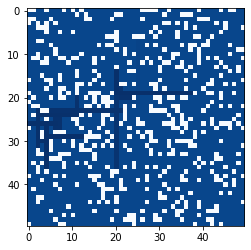

Run: 0
Team: 01171268-bf7f-4324-9a71-2ebd0bc84960
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? 

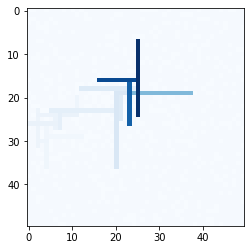

Run: 0
Team: 3c00c4ce-688d-4d27-92e7-371e34ff4fdf
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ↓ ? ? ? ? ? ↓ ↓ ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ↓ ? ? X X ? ↓ ↓ ? ? ? ↓ ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ↓ ? X X ? ? ↓ ? X → ↓ → → ↓ ← X ? ↓ ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → ↑ ← ← ↓ ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → → ← ← ← ← ← ← ← ↑ ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X → → ↑ → → → → → ↑ X ↑ ? ↑ ↓ ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

← ← ← ← ← ← ← ↓ ← ← ← ↓ ← ↑ ← ← ← ↑ X X X ↑ ? ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → → ↑ → → → ↑ ← ← X ↑ ? ↑ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ↑ ? ? ? ↓ ? ↑ ? ? X ↑ X X ? ↑ ? ↑ ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ↑ ? ? ? ↓ ? ↑ ? ? 

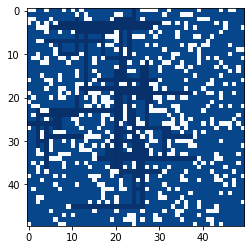

Run: 0
Team: 525ed496-970c-46d8-8dd5-5943e3cff083
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ↓ ? ? ? ? ? ↓ ↓ ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ↓ ? ? X X ? ↓ ↓ ? ? ? ↓ ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ↓ ? X X ? ? ↓ ? X ↓ ↓ → → ↓ ← X ? ↓ ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → → → → → ↑ → → → ↓ → ↑ → → → → ↑ X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X → → ↑ → → → ↑ → ↑ X ↓ ? ↑ ↓ ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

← ← ← ← ← ← ← ↓ ← ← ← ↓ ← ↑ ← ← ← ↑ X X X ↓ ? ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → → → → → → ↑ ← ← X ↓ ? ↑ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ↑ ? ? ? ↓ ? ↑ ? ? X ↑ X X ? ↓ ? ↑ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ↑ ? ? ? ↓ ? ↑ ? ? 

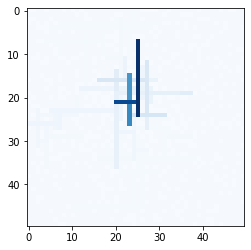

Run: 0
Team: 9a29bdf9-b100-4195-9713-6d4ac2a4298f
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ↓ ? ? ? ? ? ↓ ↓ ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ↓ ? ? X X ? ↓ ↓ ? ? ? ↓ ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ↓ ? X X ? ? ↓ ? X → → → → ↓ ← X ? ↓ ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ ← ← ← ← ← ← ← ← ← ← ↓ ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X → → → → → → → → ↑ X ↑ ? ↑ ↓ ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

← ← ← ← ← ← ← ↓ ← ← ← ↓ ← ↑ ← ← ← ↑ X X X ↑ ? ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → → ↑ → → → ↑ ← ← X ↑ ? ↑ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ↑ ? ? ? ↓ ? ↑ ? ? X ↑ X X ? ↑ ? ↑ ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ↑ ? ? ? ↓ ? ↑ ? ? 

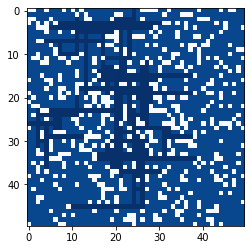

Run: 1
Team: 7d63298e-ec55-45a3-b3b3-a9631740e7b5
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ↓ ? ? ? ? ? ↓ ↓ ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ↓ ? ? X X ? ↓ ↓ ? ? ? ↓ ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ↓ ? X X ? ? ↓ ? X ↓ ↓ → → ↓ ← X ? ↓ ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → ↑ → → → → → → → ↓ → ↑ ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X → → ↑ → → → ↑ → ↑ X ↓ ? ↑ ↓ ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

← ← ← ← ← ← ← ↓ ← ← ← ↓ ← ↑ ← ← ← ↑ X X X ↓ ? ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → → ↑ → → → ↑ ← ← X ↓ ? ↑ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ↑ ? ? ? ↓ ? ↑ ? ? X ↑ X X ? ↓ ? ↑ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ↑ ? ? ? ↓ ? ↑ ? ? 

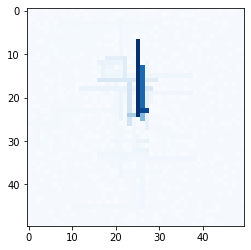

Run: 1
Team: c0b80716-dafb-4bb8-a124-63d9fe08e60d
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ↓ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ↓ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ↓ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ↑ ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? 

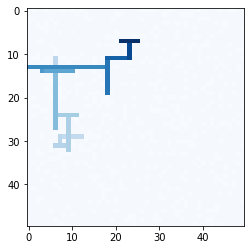

Run: 1
Team: e2d91406-adcd-453c-af4e-a96a720c0a66
X X ? ? X ? ? ? X ↓ X ? X → → → → → → → → → → ↓ ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ↓ ↓ X ↓ X ? ↑ ? ↓ ↓ ? X X ↓ ↓ ↓ ↑ ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ↓ ↓ ? ↓ X X ↑ ? ↓ ↓ X ← ↓ ↓ ↓ ← ↑ X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → → → ↓ ← ↑ ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → ↓ → → → → → ↑ → → ↑ → → → ↓ ↓ → ↑ ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ↓ X → → → → ↑ → → ↑ ↑ X → → ↓ → ↑ ↑ ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ↓ ? ? ↑ ↓ ? ↑ ? ↑ X X X → → ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ↓ ? ? ↑ ↓ ? ↑ ? ↑ ? ? X ↓ ↑ → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ↓ ? ? ↑ ↓ ? ↑ X ↑ X X ? ↓ ↑ ↑ ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → → → → → ↑ 

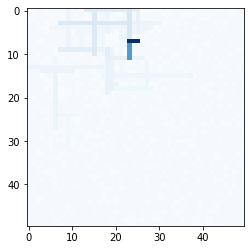

Run: 1
Team: a415e773-b374-4638-93b2-4903aafa177f
X X ? ? X ? ? ? X ↓ X ? X → ↓ ← ↓ ↓ ↓ ← ← ← ↓ ↓ ← ↓ X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ↓ ↓ X ↓ X → → ↓ ↓ ↓ ← X X ↓ ↓ ↓ ↓ ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ↓ ↓ ↓ ↓ X X ↓ ↓ ↓ ↓ X ← ↓ ↓ ↓ ← ↓ X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → ↓ ↓ → → ↓ → ↓ → → ↓ ↓ ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → → → → → → → → → ↓ → → ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ↓ X → ↑ → → → → ↑ → ↑ X ↓ → ↓ → → ↑ ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ↓ ? ↑ ↑ ↑ ? ↑ ↑ ↑ X X X ↓ ← ← X X X ↓ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ← ← ← ← ← ↓ ← ↑ ↑ ↑ ← ↑ ↑ ↑ ← ← X ↓ ↑ ↑ ? G ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ↓ ? ↑ ↑ ↑ ? ↑ X ↑ X X ? ↓ ↑ ↑ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → → ↑ ← ← ← 

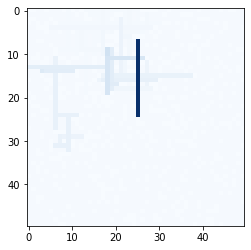

Run: 2
Team: fe3307f4-b85b-4f15-af85-f3b3659ca16b
X X ? ? X ? ? ↓ X ↓ X ? X → → → → → ↓ → → → → ↓ ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ↓ ↓ ↓ X ↓ X → ↓ ↓ ↓ ↓ ← X X ↓ ↓ ↓ ↓ ? ↓ ↓ ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X → → → ↓ ↓ ↓ ↓ X X ↓ ↓ ↓ ↓ X → ↓ → ↓ ← ↓ X ↓ ↓ ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → ↑ → → → → ↑ ← ← ↑ ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↓ ↓ X → → ↑ → → ↑ → ↑ ← X ↑ → ↑ → → ↑ ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ↓ ↓ ↓ ? ↑ ↑ ↑ ↑ ↑ ↑ ↑ X X X ↑ ← ↑ X X X ↓ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ← ← ← ↓ ← ↓ ← ↑ ↑ ↑ ↑ ← ↑ ↑ ← ← X ↑ ↑ ↑ ? G ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ← ↓ ← ← ← ↑ ↑ ↑ ↑ ↑ X ↑ X X ? ↑ ↑ ↑ ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → ↑ ↑ ↑ ↑ ← 

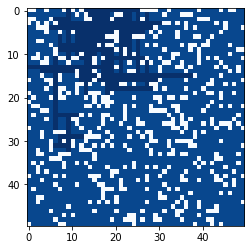

Run: 2
Team: 796df2af-a702-4a10-8ab9-63a8e112c5bf
X X ? ? X ? ? ? X ↓ X ? X ? ? ↓ ? ? ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ↓ ? X ? X ? ↓ ? ? ? ? X X ? ↓ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ↓ ? ? ? X X ↓ ? ? ? X ? ? ? ↓ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ↑ ? ? ? ↓ ? ↓ ? ? ? ? ? ? ? ↓ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ↑ X ? ? ↓ ? ↓ ? ? ? ? X ? ? ↓ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ↓ ? ↑ ↓ ? ? ↓ ? ↓ ? ? X X X ? ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → ↑ → → → → → ↓ ← ← ← ← X ? ? → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → → → ↑ ← ← ← ← ← ← X ? X X ? ? ? ↓ ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ↑ ? ↑ ↓ ? ? ↑ ? ↓ 

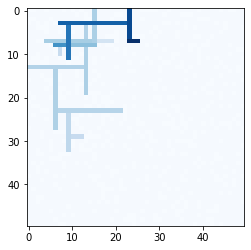

Run: 2
Team: 76c9c433-836f-41e0-b046-502c2a17cd4c
X X ? ? X ? ? ? X ↓ X ? X ? ? ↓ ? ? ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ↓ ? X ? X ? ↓ ? ? ? ? X X ? ↓ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ↓ ? ? ? X X ↓ ? ? ? X ? ↓ ? ↓ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ → ↓ → → → → → → → ↓ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ↑ ? ? ? ↓ ? ↓ ? ? ? ? ? ↓ ? ↓ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ↑ X ? ? ↓ ? ↓ ? ? ? ? X ↓ ? ↓ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ↓ ? ↑ ↓ ? ? ↓ ? ↓ ? ? X X X ↓ ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → ← ← ← ← ← ← ← ← ← X ↓ ? ↓ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → ↑ ← ← ← ← ← ← ← ← X ? X X ← ↓ ← ← ← ← ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ↑ ? ↑ ↓ ? ? ↓ ? ↓ 

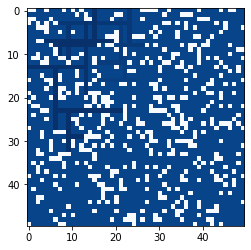

Run: 2
Team: 4e9e4379-e533-4f1a-b0e8-1a83ac565b29
X X ? ? X ? ? ? X ? X ? X ← ← ↓ ← ← ← ← ← ← ← ← ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ↓ ? ? ? ? X X ? ↑ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ↓ ↓ X X ↓ ? ? ? X ? ? ? ↑ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ → ↓ → → → → → → → ↑ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ↑ ↓ ↓ ? ↓ ? ? ? ? ? ? ? ↑ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ↑ ↓ ↓ ? ↓ ? ? ? ? X ? ? ↑ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ↓ ? ? ↓ ↑ ↓ ↓ ? ↓ ? ? X X X ? ? ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → → ↓ ← ← ← ← ← ← X ? ? ↑ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → ↑ → → → → ↑ ↓ ← ← X ? X X ? ? ? ↑ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ↑ ← ← ← ← ↑ ↓ ← ← 

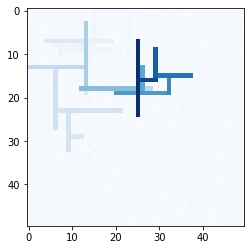

Run: 2
Team: acde85c7-e9b8-4bf9-a6d2-1acc68374df4
X X ? ? X ? ? ? X ? X ? X ← ← ↓ ← ← ← ← ← ← ← ← ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ↓ ? ? ? ? X X ? ↑ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ↓ ↓ X X ↓ ? ? ? X ? ? ? ↑ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ → ↓ → → → → → → → ↑ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ↓ ? ? ? ? ↑ ↓ ↓ ? ↓ ? ? ? ? ? ? ? ↑ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ↓ X ? ? X ↑ ↓ ↓ ? ↓ ? ? ? ? X ? ? ↑ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

← ← ← ← ← ← ↓ ↓ ← ← ← ← ← ↓ ← ↓ ← ← X X X ? ? ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → ← ← ← ← ← ← ← ← ← X ? ? ↑ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → ↑ ← ← ← ← ← ← ← ↑ X ? X X ? ? ? ↑ ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ↑ ← ← ← ← ← ← ← ↑ 

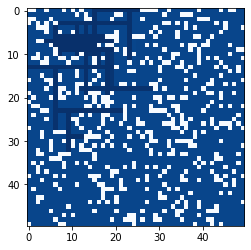

Run: 2
Team: 0a7c09b7-f807-4eca-aec7-1b65192db1e2
X X ? ? X ? ? ? X ? X ? X ← ← ↓ ← ← ← ← ← ← ← ← ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ↓ ? ? ? ? X X ? ↑ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ↓ ↓ X X ↓ ? ? ? X ? ? ? ↑ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ → ↓ → → → → → → → ↑ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ↓ ? ? ? ? ↑ ↓ ↓ ? ↓ ? ? ? ? ? ? ? ↑ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ↓ X ? ? X ↑ ↓ ↓ ? ↓ ? ? ? ? X ? ? ↑ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

← ← ← ← ← ← ↓ ↓ ← ← ← ← ← ↓ ← ↓ ← ← X X X ? ? ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → → → → ← ← ← ← ← X ? ? ↑ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → ↑ → → → → ↑ ↓ ← ↑ X ? X X ? ? ? ↑ ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → → → ↓ → ↑ 

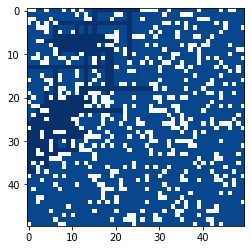

Run: 2
Team: 8144cc60-93f3-4854-a702-722edbe53e1d
X X ? ? X ? ? ? X ? X ? X ← ← ↓ ← ← ← ← ← ← ← ← ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ↓ ? ? ? ? X X ? ↑ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ↓ ↓ X X ↓ ? ? ? X ? ? ? ↑ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ → ↓ → → → → → → → ↑ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ↓ ? ? ? ? ↑ ↓ ↓ ? ↓ ? ? ? ? ? ? ? ↑ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ↓ X ? ? X ↑ ↓ ↓ ? ↓ ? ? ? ? X ? ? ↑ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

← ← ← ← ← ← ↓ ↓ ← ← ← ← ← ← ← ↓ ← ← X X X ? ? ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → ← ← ← ← ← ← ← ← ← ← X ? ? ↑ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → ↑ → → → → ↑ ↑ ← ↓ X ? X X ? ? ? ↑ ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ↑ → → → → ↑ → → ↑ 

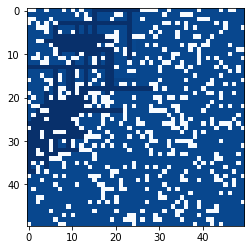

Run: 2
Team: 4943f5a1-3d63-446c-9d20-5a2fd2ee4ef4
X X ? ? X ? ? ? X ? X ? X ← ← ↓ ← ← ← ← ← ← ← ← ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ↓ ? ? ? ? X X ? ↑ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ↓ ↓ X X ↓ ? ? ? X ? ? ? ↑ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ → ↓ → → → → → → → ↑ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ↓ ? ? ? ? ↑ ↓ ↓ ? ↓ ? ? ? ? ? ? ? ↑ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ↓ X ? ? X ↑ ↓ ↓ ? ↓ ? ? ? ? X ? ? ↑ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

← ← ← ← ← ← ↓ ↓ ← ← ← ← ← ↓ ← ↓ ← ← X X X ? ? ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → ↓ ← ← ← ← ← ↓ ← ↓ ← ← ← ← X ? ? ↑ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → ↓ ← ← ← ← ← ↓ ← ↓ X ? X X ? ? ? ↑ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → → → → → → 

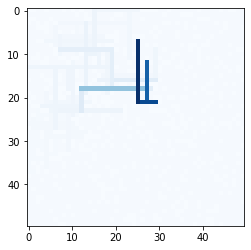

Run: 3
Team: 928fca18-8cce-4544-930c-f7bf18b8b390
X X ? ? X ? ? ? X ? X ? X ← ← ↓ ← ← ← ← ← ← ← ← ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ↓ ? ? ? ? X X ? ↑ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ↓ ↓ X X ↓ ? ? ? X ? ? ? ↑ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ → ↓ → → → → → → → ↑ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ↓ ? ? ? ? ↑ ↓ ↓ ? ↓ ? ? ? ? ? ? ? ↑ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ↓ X ? ? X ↑ ↓ ↓ ? ↓ ? ? ? ? X ? ? ↑ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

← ← ← ← ← ← ↓ ↓ ← ← ← ← ← ↓ ← ↓ ← ← X X X ? ? ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → → ↓ ← ↓ ← ← ← ← X ? ? ↑ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → ↓ → → → → ↑ ↓ → ↓ X ? X X ? ? ? ↑ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → → → ↓ → → 

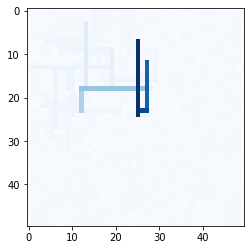

Run: 3
Team: 8123678d-ab9b-474c-b6b4-942598bf8fd4
X X ? ? X ? ? ? X ? X ? X ? ? ↓ ? ↓ ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ↓ ? ↓ ? ? X X ? ↓ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ↓ X X → → ↓ ← X ? ↓ ? ↓ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ↓ X → → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ↓ ? ? ? ? ? ? ↑ ↓ ? ↑ ? ↓ ? ? ? ↑ ? ↓ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ↓ ? X ? ? X ? ↑ ↓ ? ↑ ? ↓ ? ? X ↑ ? ↓ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ↓ ? ? ? ? ? ? ↑ ↓ ? ↑ ? ↓ X X X ↑ ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → ↑ ← ← ← ← ← ← ← X ↑ ? ↓ → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ↑ ↓ ? ↑ X ↓ X X ? ↑ ? ↓ ↑ ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → → ↑ ↓ → → 

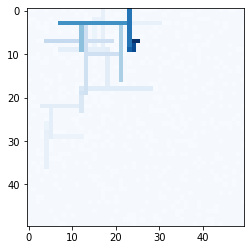

Run: 3
Team: 4124f197-95ca-4072-ac32-4a33e79f441c
X X ? ? X ? ? ? X ? X ? X ? ? ↓ ? ↓ ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ↓ ? ↓ ? ? X X ? ↓ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ↓ X X → → ↓ ← X ? ↓ ? ↓ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ↓ X → → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ↓ ? ? ? ? ? ? ↑ ↓ ? ↑ ? ↓ ? ? ? ↑ ? ↓ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ↓ ? X ? ? X ? ↑ ↓ ? ↑ ? ↓ ? ? X ↑ ? ↓ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ↓ ? ? ? ? ? ? ↑ ↓ ? ↑ ? ↓ X X X ↑ ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → ↑ ← ← ← ← ← ← ← X ↑ ? ↓ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ↑ ↑ ? ↑ X ↓ X X ? ↑ ? ↓ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → → ↑ ↑ → → 

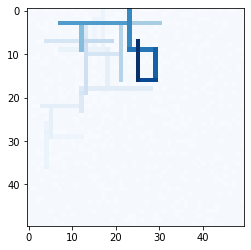

Run: 3
Team: 94e38c28-e670-4f0f-8126-a1658d1ad831
X X ? ? X ? ? ? X ? X ? X ? ? ↓ ? ↓ ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ↓ ? ↓ ? ? X X ? ↓ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ↓ X X → → ↓ ← X ? ↓ ? ↓ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ↓ X → → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ↓ ? ? ? ? ? ? ↑ ↓ ? ↑ ? ↓ ? ? ? ↑ ? ↓ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ↓ ? X ? ? X ? ↑ ↓ ? ↑ ? ↓ ? ? X ↑ ? ↓ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ↓ ? ? ? ? ? ? ↑ ↓ ? ↑ ? ↓ X X X ↑ ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → ↑ ← ← ← ← ← ← ← X ↑ ? ↓ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ↑ ↑ ? ↑ X ↓ X X ? ↑ ? ↓ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → → ↑ ↑ → → 

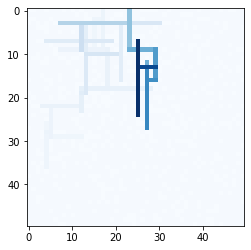

Run: 3
Team: 56bf1fd9-bf99-48e2-a216-84a846caf5e4
X X ? ? X ? ? ? X ? X ? X ? ? ↓ ? ↓ ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ↓ ? ↓ ? ? X X ? ↓ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ↓ X X → → ↓ ← X ? ↓ ? ↓ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ↓ X → → → → → → ↓ → ↑ ← ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ↓ ? ? ? ? ? ? ↑ ↓ ? ↑ ? ↓ ? ? ? ↑ ? ↓ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ↓ ? X ? ? X ? ↑ ↓ ? ↑ ? ↓ ? ? X ↑ ? ↓ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ↓ ? ? ? ? ? ? ↑ ↓ ? ↑ ? ↓ X X X ↑ ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → ← ↓ ← ← ← ← ← ← X ↑ ? ↓ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ↑ ↓ ? ↑ X ↓ X X ? ↑ ? ↓ ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → → → ↓ → → 

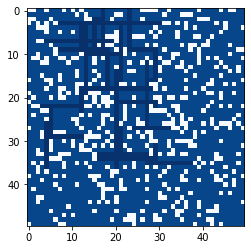

Run: 4
Team: 03ea9b4b-5a57-44c9-8aee-b236d5cdab9c
X X ? ? X ? ? ? X ? X ? X ? ? ↓ ? ↓ ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ↓ ? ↓ ? ? X X ? ↓ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ↓ X X → → ↓ ← X ? ↓ ? ↓ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ↓ X → → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ↓ ? ? ? ? ? ? ↑ ↓ ? ↑ ? ↓ ? ? ? ↑ ? ↓ ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ↓ ? X ? ? X ? ↑ ↓ ? ↑ ? ↓ ? ? X ↑ ? ↓ ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ↓ ? ? ? ? ? ? ↑ ↓ ? ↑ ? ↓ X X X ↑ ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → ↑ ← ← ← ← ← ← ← X ↑ ? ↓ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ↑ ↓ ? ↑ X ↓ X X ? ↑ ? ↓ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → → ↑ ↓ → → 

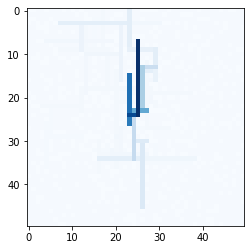

Run: 4
Team: 360e772b-a6e8-4053-b87a-528194451352
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X ? ? ↓ ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → ↓ ← ← ← ← X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ? X X ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ? ? ? ? ↓ ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ↓ X ? ? ? ? ? ? ↓ ? ? 

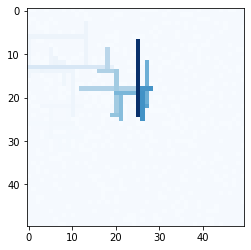

Run: 4
Team: 8e2f662b-bcc2-4b94-be1d-9aa5d9da0272
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X ? ? ↓ ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → ↓ ← ← ← ← X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ? X X ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ? ? ? ? ↓ ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ↓ X ? ? ? ? ? ? ↓ ? ? 

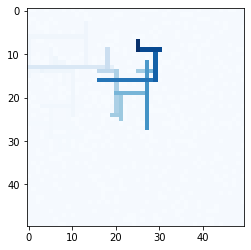

Run: 4
Team: 8e3bfd9b-1dee-4ea2-8893-a2c004478441
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ↓ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X ? ? ↓ ? ? ? ? ? ? X ↓ ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → ↓ ← ← ← ← X X X ↓ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ? X X ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ? ? ? ? ↓ ? ? X ? X X ? ↑ ? ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ↓ X ? ? ? ? ? ? ↓ ? ? 

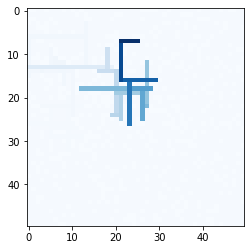

Run: 4
Team: 8c1443aa-c9b6-4be5-bd64-e31f41c0460f
X X ? ? X ? ? ? X ↓ X ? X ? ? ↓ ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ↓ ? X ? X ? ↓ ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ↓ ? ? ? X X ↓ ? ? ? X ? ↓ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ↓ ? ? ? ↓ ↓ ↓ ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X → → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ↓ X ? ↑ X ? ? ↓ ↓ ↓ ? ? ? ? X ↓ ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → ↓ → → ↑ → → → ↓ ← ↓ ← ← X X X ↓ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ? X X → → → → → ↑ → → → → → ↓ ← ← ← ← X ↓ ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ↓ ← ← ↑ ← ← ← ← ← ← X ? X X ? ↓ ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ↓ X ? ? ↑ ? ? ? ↓ ↓ ↓ 

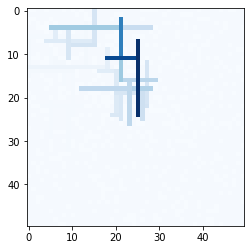

Run: 5
Team: 3d02787f-84f0-4764-b0c9-2b9bc22149f6
X X ? ? X ? ? ? X ↓ X ? X ? ↓ ↓ ? ↓ ↓ ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ↓ ↓ ? X ? X → ← ← ← ← ← X X ? ↓ ? ? ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ↓ ↓ ? ? ? X X ↓ ? ↑ ↓ X ? ↓ ? ↓ ? ? X → → → → → → → → ↓ ← ← ← X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ↓ ↓ ? ? ? ↓ ↓ ↓ ? ↑ ↓ ? ? ↓ ? ↓ ? ? ? ↑ ? ? ? X X ? X ↓ X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X → ↓ ← ← ← ← ← ← ↓ ↓ ← ← ↑ ← ← ← ← ← ← ← ← ← ← ← X ← ← ↓ ← ← ← X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ← ↓ X → ↓ X ? ? ↓ ↓ ↓ ? ↑ ↓ ? X ↓ ? ↓ ? ? ? ↑ X ? X ? ↓ ? X ↓ ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → ↓ → ↓ → → ↓ → → → ↓ ↓ ↓ ← ↑ X X X ↓ ? ↓ X X X ↑ ? X ? ? ↓ ? X ↓ ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ? X X → → → → → → → → → ↓ ↓ → → ↑ ← ← X ↓ ? ↓ ? G ? ↑ ? ? ? ? ↓ ? ? ↓ ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ↓ X → → → → ← ← ← ↓ ↓ ← X ↑ X X ? ↓ ? ↓ ? ↓ ? X ? X ? ? ↓ ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ↓ ↓ X ← ↑ ↑ ← ← ← ↓ ↓ ← 

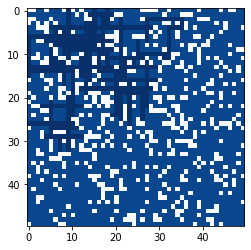

Run: 6
Team: e414eb46-076c-4927-9f53-c7dc1dff8b14
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? 

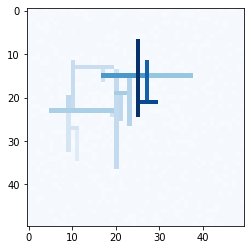

Run: 7
Team: 2f42c2ed-0c07-4142-a92b-8c03ff27bf3c
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ↓ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ↑ ? ? ? ? ? ? X ↓ ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ↑ ? ? ? ? X X X ↓ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ↑ ? ? ? ? ? ? X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ↑ ? ? X ? X X ? ↓ ? ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ↑ ? ? 

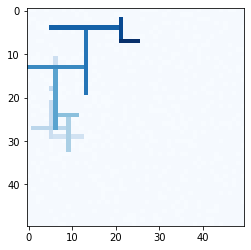

Run: 7
Team: d6618f99-72e9-4fdb-8297-391fa1ac3390
X X ? ? X ? ? ? X ? X ? X ? ? ? ↓ ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ↓ ? ? ? X X ? ? ? ? ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ↓ ? ? X ? ? ? ? ? ? X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → → → → → → → ↓ ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X ? ? ? ? ? ? ? ? ? ? ? ↑ ? ? ? ? ? ? ? ? ? ? ↓ ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X ? ? ? ? ? ↑ ? ? ? X ? ? ? ? ? ? ↓ X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → → → → ↑ ← X X X ? ? ? X X X ↓ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ? X X ? ? ? ? ? ? ? ? ? ? ? ? ↑ ? ? ? X ? ? ? ? G ← ← ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ? X ? ? ? ? ? ? ? ? ? 

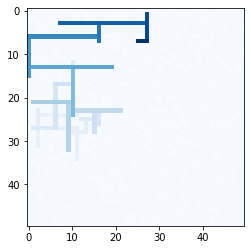

Run: 7
Team: ec7cf27c-8a89-4379-b306-4f0284860a91
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X ? ? ↓ ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → ↓ ← ← ← ← X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ? X X ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ? ? ? ? ↓ ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ? X ? ? ? ? ? ? ↓ ? ? 

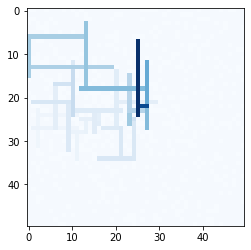

Run: 7
Team: 8a1efee0-3a02-451c-9aff-4e189b241c86
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X ? ? ↓ ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → ↓ ← ← ← ← X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ? X X ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ? ? ? ? ↓ ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ? X ? ? ? ? ? ? ↓ ? ? 

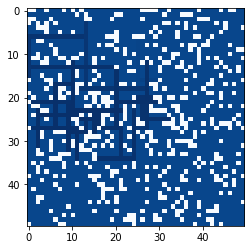

Run: 7
Team: 0a6665cf-b2ad-450e-b5a2-582fd64f0d98
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X ? ? ↓ ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → ↓ ← ← ← ← X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ? X X ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ? ? ? ? ↓ ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ? X ? ? ? ? ? ? ↓ ? ? 

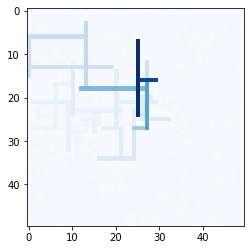

Run: 8
Team: ee8e606e-895f-49a4-932b-9912b35e9d54
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X ? ? ↓ ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → ↓ ← ← ← ← X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ? X X ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ? ? ? ? ↓ ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ? X ? ? ? ? ? ? ↓ ? ? 

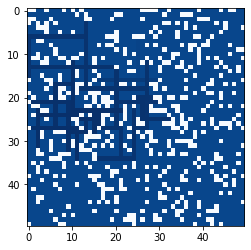

Run: 8
Team: c3111fbd-a784-4462-9a8b-d21f4beba9a8
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? 

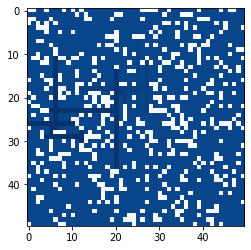

Run: 8
Team: e6e5922a-1853-4e02-97d8-9ce5997429f3
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? 

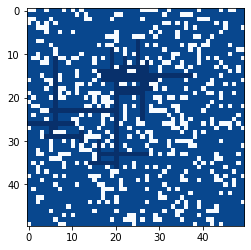

Run: 8
Team: f98ed083-9dbf-4a72-8afa-d5868014439f
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? 

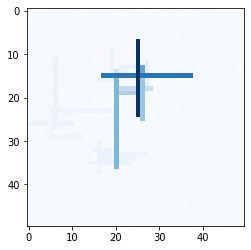

Run: 9
Team: d3e87111-4993-47ab-8ffb-d2f9e4bbaa6e
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? 

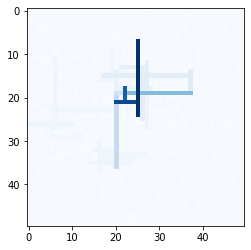

Run: 9
Team: 9e2f0614-2442-4eeb-bfd2-1be2598a84aa
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ↓ X ? ? ? ? ? ? ? ? ? 

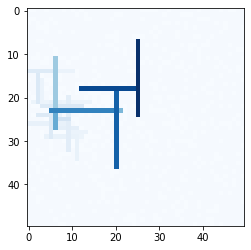

Run: 9
Team: a2a62a52-ad95-4ef4-a3fa-4f9dbcbf15e7
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ↓ X ? ? ? ? ? ? ? ? ? 

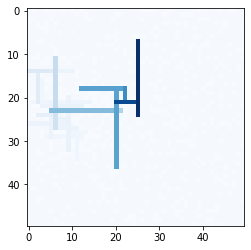

Run: 9
Team: 78f3a5c2-b395-4a1d-9a60-b76526af8fb0
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ↓ ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ↓ ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G → → → → → → → → → → ↓ ? ? ? ? X ↓ ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ? ? X ? X ? ? ? ? ? X ↓ X X ? X X ↓ ? ? ? X ? ? ? 

? ? ? ? ? ↓ X ? ? ? ? ? ? ? ? ? 

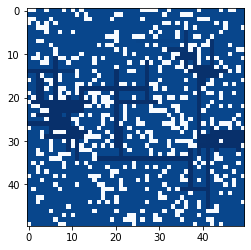

Run: 9
Team: 9e190e08-fe15-4cfd-b7ce-200974f0e83e
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ↓ ? ↓ ↓ X ? X X ↓ ← 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X → → → → → ↓ → → → ↓ ← ← 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X → → → → → ↓ ↑ ↑ 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ↓ ? ↑ X ? X → ↓ ↑ ↑ 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ↓ ? ↑ ↓ ? X ↓ ↓ ↑ X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X → → → → → ↓ ← ← ← X ← ↓ ↓ ↑ ← 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ↓ ? X X ↓ ? X ↑ ↓ ← ← ← ← ← 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X ↓ ↑ ↓ ? ↓ ↑ ↑ ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ? ? X ? X ? ? ? ? ↓ X ↓ X X ? X X ↓ ↑ ← ← X ↑ ↑ ? 

? ? ? ? ? ↓ X ? ? ? ? ? ? ? ? ? 

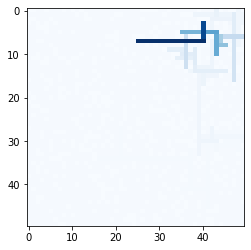

Run: 10
Team: aadfbfa3-15da-4297-b7ad-5c9e726c82e6
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ↓ ? ↓ ↓ X ↓ X X ↓ ← 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X → → → → → → ← ← ← ← ← ← 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X → → → ↑ → ↓ ↑ ↑ 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ↑ X ? X → ↓ ↑ ↑ 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ↑ ↓ ? X ↓ ↓ ↑ X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X → → → → → → → ↑ ← X ← ↓ ↓ ↑ ← 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ↓ ? X X ? ? X → → → → ↓ ↑ ← 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G → → → → → → → → ↓ ? ↓ ? ? ? ? X → → ↓ → ↑ ↓ ↑ ← 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ? ? X ? X ? ? ? ? ↓ X ↓ X X ? X X ↓ ↑ ↓ ? X ↓ ↑ ? 

? ? ? ? ? ↓ X ? ? ? ? ? ? ? ? ?

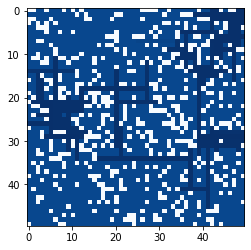

Run: 10
Team: 84fb8051-b3a1-43a6-b8fe-f06fb8ccdaee
X X ? ? X ? ? ↓ X ↓ X ? X ? ? ↓ ↓ ↓ ↓ ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ? ↓ ? X ? X ← ↓ ↓ ↓ ← ← X X ? ? ? ? ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ↓ ? ↓ ? ↓ ? X X ↓ ↓ ↓ ↓ X ? ↓ ? ? ? ? X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ↓ X → → → → → → → → → ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → ↓ → ↑ → → → → → ↓ ↑ ← ← ↑ ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ↓ ? X ? ↓ X ↑ ? ↓ ↓ ↓ ↓ ↓ ↑ ? X ↑ ? ? ? ? ? ↓ X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → ↑ ← ← ↓ ← ← ← X X X ↑ ? ? X X X ↓ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → ↑ → ↑ → → ↓ ← ← ↓ ← ← X ↑ ? ? ? G → → ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ↓ X ? ? ? ↑ ? ↑ ? ↑ ↓ ↓ X ↓ X X ? ↑ ? ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ↓ ? X → → → → → ← ← ← ←

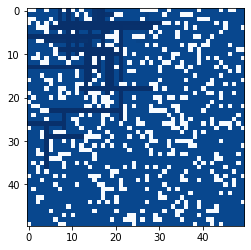

Run: 11
Team: 992c1eb6-1540-4f8a-9087-83c58b44da71
X X ? ? X ? ? ↓ X ↓ X ? X ? ? ↓ ? ↓ ↓ ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ? ↓ ? X ? X ← ↓ ← ← ← ← X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ↓ ? ↓ ? ↓ ? X X ↓ ? ↓ ↓ X ? ↓ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → ↓ ← ← ← ← ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → ↓ → → ↓ → → → ↓ ↓ → → → ← ← ← ← ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ↓ X ? ↓ X ↑ ? ↓ ↓ ↓ ? ↑ ↑ ? X ↑ ? ? ? ? ↓ ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → ← ← ← ← ← ← ← ← ← ← ← ← ← X X X ↑ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → → → → ↓ ← ← ↑ ← ← X ↑ ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ↓ X ↓ ? ? ↑ ? ↑ ? ↓ ↓ ↓ X ↑ X X ? ↑ ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ↓ ? X → → → → → ← ← ↓ ←

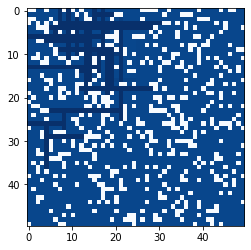

Run: 11
Team: f5a83d46-2d2a-4849-b8d2-8e973a8bb675
X X ? ? X ? ? ↓ X ↓ X ? X ? ? ↓ ↓ ↓ ? ? ? ? ↓ ↓ ↓ ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ↓ ↓ ? X ↓ X ? ↓ ↓ ↓ ? ? X X ↓ → → → → → ↓ ← ← X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ↓ ↓ ↓ ? ? ↓ X X ↓ ↓ ← ← X ? ↓ ↓ ↓ ↑ ? X ? ↓ ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → ↓ ← ← ← ← ← ← ← ← ← ↓ ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↑ ↓ X → → → → ↑ ← ↑ ← ← X ↓ ↓ ↑ ↑ ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → ↑ ↓ ↑ ← ↑ X X X ↓ ↓ ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↑ ↑ ↓ ? ↓ ↑ ↓ ↑ ↓ ↑ ? ? X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ← ← ↑ ↑ ← ← ← ↑ ← ↑ X ↑ X X → → → ↑ ← ← ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → ↑ ← ← ← ← ↑ ← ↑

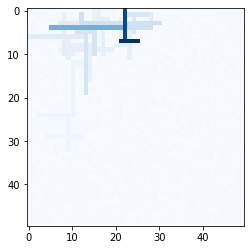

Run: 11
Team: 442ac6bb-515a-4def-b676-ca9e32684e47
X X ? ? X ? ? ↓ X ↓ X ? X ? ? ↓ ↓ ↓ ? ? ? ? ↓ ↓ ? ↓ X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ↓ ↓ ? X ↓ X ? ↓ ↓ ↓ ? ? X X ↓ ↓ ? ↓ ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ↓ ↓ ↓ ? ? ↓ X X ↓ ↓ ← ← X ← ↓ ← ← ← ← X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → ↓ ↑ ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → ↑ ↑ → → → → → ↓ ← ↑ ← ← ← ↓ ↑ ↑ ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↑ ↑ X → → → → ↓ ← ↑ ← ← X ↓ ↑ ↑ ? ↓ ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → ↑ ↑ → → → ↑ ↓ ↓ ← ↑ X X X ↓ ↑ ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↑ ↑ ↓ ? ↓ ↑ ↓ ↓ ↓ ↑ ? ? X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ← ← ↑ ↑ ← ← ← ← ← ← X ↑ X X → ↑ ↑ ↑ ← ← ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → ↑ ← ← ← ← ← ← ←

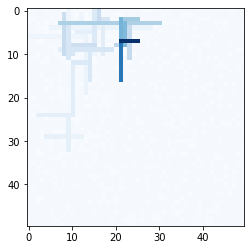

Run: 11
Team: 1d03175e-7e75-4ecd-b5ad-fd5507bc461c
X X ? ? X ? ? ↓ X ↓ X ? X ? ? ↓ ↓ ↓ ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ↓ ↓ ↓ X ↓ X ? ↓ ↓ ↓ ? ? X X ? ↓ ? ? ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ↓ ↓ ↓ ↓ ? ↓ X X ↓ ↓ ← ← X ? ↓ ? ↓ ? ? X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ↓ → → ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ↓ ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → → → → → → → → → → → → → → → ↓ ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↓ ↓ X → → → → ↓ ← ↑ ← ← X ↓ ? ↑ ? ? ↓ ↓ X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → ↑ ↓ ↓ ← ↑ X X X ↓ ? ↑ X X X ↓ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↓ ↑ ↓ ? ↓ ↑ ↓ ↓ ↓ ↑ ? ? X ↓ ? ↑ ? G ← ← ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ← ← ↓ ↑ ← ← ← ↑ ← ↓ X ↑ X X → → → ↑ ← ← ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → ↓ ← ← ← ← ↑ ← ↑

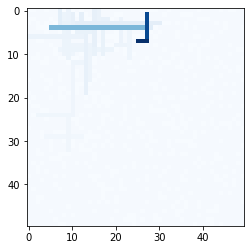

Run: 11
Team: 58ca04ba-5b87-453d-8d96-cd20c6cc9b76
X X ? ? X ? ? ↓ X ↓ X ? X ? ? ↓ ↓ ↓ ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ↓ ↓ ↓ X ↓ X ? ↓ ↓ ↓ ? ? X X ? ↓ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ↓ ↓ ↓ ↓ ? ↓ X X → → ← ← X ? ↓ ? ↓ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → ↓ → → ↓ → → → → → → → → ← ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → ↓ → → → → ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↓ ↓ X → → → → ↑ → ↑ ← ← X ↓ ? ↑ ? ? ↓ ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → ↑ ↓ ↑ ← ↑ X X X ↓ ? ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↓ ↑ ↓ ? ↑ ↑ ↓ ↑ ↓ ↑ ? ? X ↓ ? ↑ ← G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ← ← ↓ ↑ ← ← ← ← ← ← X ↑ X X → → → ↑ ← ← ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → ↑ ↑ ← ← ← ← ←

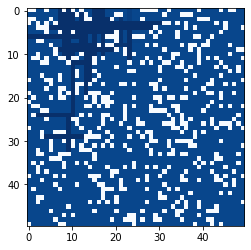

Run: 12
Team: 0afcac3e-766b-4c88-80ee-2b186248a25c
X X ? ? X ? ? ↓ X ↓ X ? X ? ? ↓ ↓ ↓ ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ↓ ↓ ↓ X ↓ X ? ↓ ↓ ↓ ? ? X X ? ↓ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ↓ ↓ ↓ ↓ ? ↓ X X → ↓ ← ← X ? ↓ ? ↓ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ↓ → ← ← ← ← ← ← ← ← ← ← ← ← ↓ ← ↓ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → ↑ → → → → → → → → → → → ↓ → ↓ ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↑ ↑ X → ↑ → → → → ↑ ← ← X ↓ ? ↓ ? ? ↓ ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → ↑ ↑ → → ↑ ↑ ↓ ↑ ← ↑ X X X ↓ ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↑ ↑ ↓ ? ↑ ↑ ↓ ↑ ↓ ↑ ? ? X ↓ ? → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ← ← ↑ ↑ ← ← ↑ ← ← ← X ↑ X X → → → ↑ ← ← ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → ↑ ↑ ← ← ↑ ← ← ↑

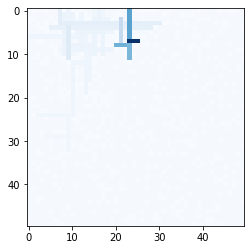

Run: 12
Team: ece9a17a-be03-4e8c-9c41-e70967e96303
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

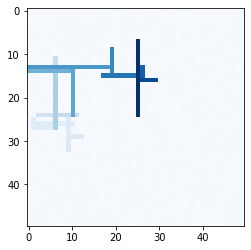

Run: 13
Team: b5c64833-690c-4345-b113-e8aee71fbaf1
X X ? ? X ? ? ? X ↓ X ? X ← ← ← ← ↓ ← ← ← ← ← ↓ ← ↓ X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ↓ ↓ ↓ X ? X ? ↓ ? ↑ ? ? X X ? ↓ ? ↓ ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ↓ ↓ ↓ ? ? X X ↓ ? ↑ ? X ? ↓ ? ↓ ? ↓ X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → → → ↓ → → ↓ ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → ↑ ← ← ← ← ← ← ← ← ← ← ← ← ← ↓ ← ← ↓ ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↓ ↑ X ? ? ? ? ↑ ? ↑ ? ? X ↑ ← ↓ ← ← ← ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → ↑ ↓ ← ← ← ← ↑ ← ↑ X X X ↑ ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↑ ↑ ↓ ? ? ? ? ↑ ? ↑ ? ? X ↑ ? ↓ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → → → ↑ → → → → → ↑ X ↑ X X → → → → → ↑ ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ↑ ↑ ↓ ? ? ? ? ↑

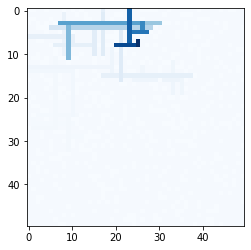

Run: 13
Team: 87e80fa5-3e88-43f1-98ef-12aedf3d85ce
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

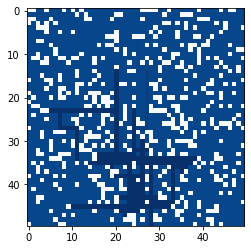

Run: 13
Team: 77a9c3da-d9a0-4f29-aa05-7a818c93c9b5
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

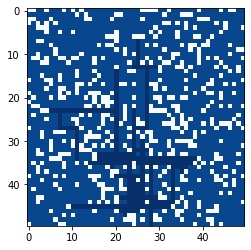

Run: 13
Team: 8aa3cc5b-5f8c-4628-8056-3750399eb26a
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

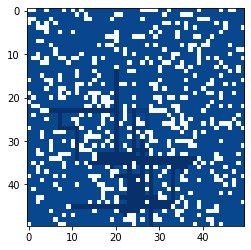

Run: 13
Team: c719fc5b-fda5-44c1-9106-60a6af61fd4e
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

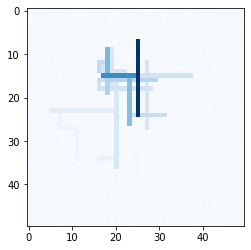

Run: 13
Team: 30632bdb-6634-43c3-802c-7a9258e9a2ff
X X ? ? X ? ? ? X ↓ X ? X ? ? ↓ ? ? ? ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ↓ ? X ? X ? ↓ ? ? ? ? X X ? ↓ ? ? ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ↓ ? ? ? X X ↓ ? ? ? X ? ? ? ↓ ? ? X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → → → ↓ → → → ↓ ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ← ← ← ← ↓ ← ← ← ↑ ← ← ← ← ← ← ← ← ← ↓ ← ← ← ↓ ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ↓ X ? ? ↑ ? ↓ ? ? ? ? X ← ← ↓ ← ← ← ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ↓ ? ? ? ↑ ? ↓ ? ? X X X ? ? ↓ X X X ↓ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ← ← ← ← ← ↓ ← ← ← ↑ ← ← ← ← ← ← X → → → → G ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → → → → → → → ↑ → ↑ X ? X X ? ? ? ↓ ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ↓ ? ? ? ↑ ? ↑

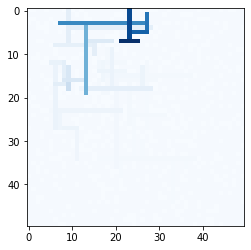

Run: 14
Team: 3e7cc16b-c37f-467b-ae4a-d9c4d82232ac
X X ? ? X ? ? ? X ↓ X ? X → → ↓ ← ← ← ← ← ← ↓ ← ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ↓ ? X ? X ? ↓ ? ? ? ↓ X X ↓ ↑ ↓ ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ↓ ? ? ? X X ↓ ? ? ? X ? ? ↓ ↑ ↓ ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → ↑ → → → → → → → → ↓ → ↑ ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ↓ X ? ? ↑ ? ↓ ? ? ? ? X ? ↓ ↑ ↑ ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ↓ ? ? ? ↑ ? ↓ ? ? X X X ? ↓ ↑ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ← ← ← ← ← ↓ ← ← ← ↑ ← ← ← ← ← ← X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → → → → → → → ↑ → ↑ X ? X X → → ↑ ↑ ← ← ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ↓ ? ? ? ↑ ? ↑

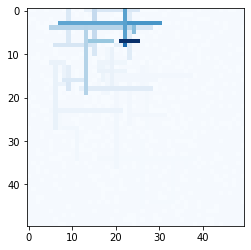

Run: 14
Team: 3f281b64-9eca-4578-95d1-518179184b14
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ↓ ? ? X ↓ X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ↓ ? ? ? ↓ X X ? ? ? ? X ? ↓ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ↓ ? ? ? ↓ ? ↓ ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↓ ? X ← ↑ ← ↓ ← ← ← ← ← X ↓ ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → ↑ ← ↓ ← ← ← X X X ↓ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↑ ? ? ? ↑ ? ↓ ? ? ? ? ? X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ← ← ↑ ← ← ← ↑ ← ← ← X ? X X ? ↓ ? ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ↑ ? ? ? ↑ ? ↑ ?

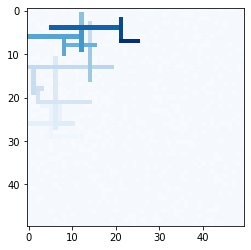

Run: 14
Team: a614db2e-db4b-4d39-ad5d-3af5bfc03a79
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ↓ ? ? ? ? ↓ ? ↓ X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ↓ ? ? X ↓ X ? ? ? ? ↓ ? X X → → → → → ↓ ↓ ← ← X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ↓ ? ? ↓ ↓ X X ? ? ? ↓ X ? ? ? ↓ ? ↑ X ↓ ↓ ← ← ← ← ← ← ← ← ← ← X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → ↓ → → → → → → → → → → → → ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → → ↓ → → → ← ← ← ← ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↓ ? X ↑ ↑ ← ↓ ← ← ← ← ← X ? ? ↓ ? ↑ ? ↑ X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → ↑ ↑ ← ↓ ← ← ← X X X ? ? ↓ X X X ↑ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↑ ? ? ↑ ↑ ? ↓ ? ? ? ? ? X ? ? ↓ ? G → ↑ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ← ← ↑ ← ← ← ← ← ↓ ← X ? X X ? ? ? ↓ ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ↑ ? ? ↑ ↑ ? ↓ ?

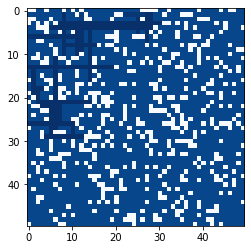

Run: 14
Team: ac9296de-36f7-469f-bb0b-38d6ff3ae8d4
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ↓ ? ? ? ↓ ↓ ? ↓ X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ↓ ? ? X ↓ X ? ? ? ? ↓ ? X X → → → → → ↓ ↓ ← ← X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ↓ ? ? ↓ ↓ X X ? ? ? ↓ X ? ? ↓ ↓ ? ↑ X → ↓ ← ← ← ← ← ← ← ← ← ← X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → ↓ ← ← ← ← ← ↓ ← ← ← ← ← ← ← ← ← ← ↑ ← ↑ ↓ ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → → ↓ → → → ← ← ← ← ← ← ← ↑ ← ↑ ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↑ ? X ↑ ↑ ← ↓ ← ← ← ← ← X ? ↓ ↓ ? ↑ ? ↑ X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → ↑ → → → ↑ ← ↓ ← ← ← X X X ? ↓ ↓ X X X ↑ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↑ ? ? ↑ ↑ ? ↓ ? ? ? ? ? X ? ← ← ← G ? ↑ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ← ← ↑ ← ← ← ↑ ← ↓ ← X ? X X ? ? ↓ ↓ ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ↑ ? ? ↑ ↑ ? ↓ ?

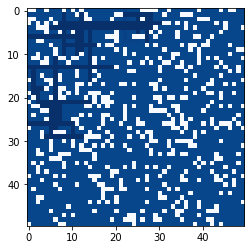

Run: 14
Team: eaf52316-b331-4d51-bc4d-7c1733124948
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ↓ ? ? ? ↓ ↓ ? ↓ X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ↓ ? ? X ↓ X ? ? ? ? ↓ ? X X ↓ → → → → ↓ ↓ ← ← X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ↓ ? ? ↓ ↓ X X ? ? ? ↓ X ? ? ↓ ↓ ? ↑ X ↓ ↓ ← ← ← ← ← ← ← ← ← ← X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → ↑ → → ↑ ↑ ← ↓ ← ← ← ← ← ← ← ↓ ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↑ ? X ↑ ↑ ← ↓ ← ← ← ← ← X ? ↓ ↓ ? ↑ ? ↑ X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → ↑ → → → ↑ ← ↓ ← ← ← X X X ? ↓ ↓ X X X ↑ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↑ ? ? ↑ ↑ ? ↓ ? ? ? ? ? X → → → → G ? ↑ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ← ← ↑ ← ← ← ← ← ← ← X ? X X ← ← ↑ ↓ ← ← ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ↑ ? ? ↑ ↑ ? ↑ ?

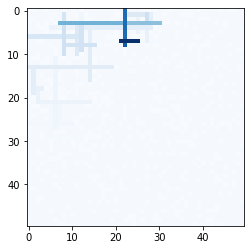

Run: 15
Team: 2c371c10-a0c8-4095-96d4-ff0ff44f6cec
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ↓ ? ? ? ↓ ↓ ? ↓ X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ↓ ? ? X ↓ X ? ? ? ? ↓ ? X X ↓ → → → → ↓ ↓ ← ← X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ↓ ? ? ↓ ↓ X X ? ? ? ↓ X ? ? ↓ ↓ ? ↑ X ↓ ↓ ← ← ← ← ← ← ← ← ← ← X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → ↑ → → ↑ ↑ ← ← ← ← ← ← ← ← ← ↓ ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↑ ? X ↑ ↑ ← ↓ ← ← ← ← ← X ? ↓ ↓ ? ↑ ? ↑ X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → ↑ → → ↑ ↑ ← ↓ ← ← ← X X X ? ↓ ↓ X X X ↑ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↑ ? ? ↑ ↑ ? ↓ ? ? ? ? ? X ? → → → G ? ↑ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ← ← ↑ ← ← ← ← ← ← ← X ? X X ← ← ↑ ↓ ← ← ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ↑ ? ? ↑ ↑ ? ↑ ?

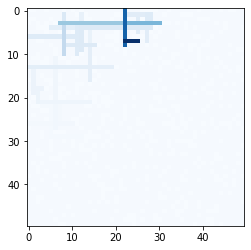

Run: 15
Team: 212c7de6-e489-46eb-b378-cb0ac381faff
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

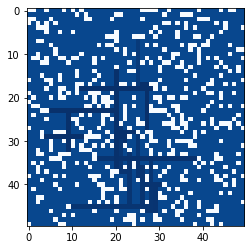

Run: 15
Team: f435cec6-2686-4c69-80cc-f55414d95d7c
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

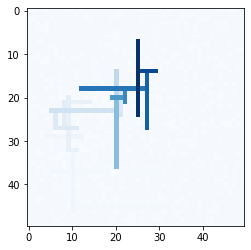

Run: 16
Team: 93e5840a-c2aa-49e0-b465-81473aa45ed1
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

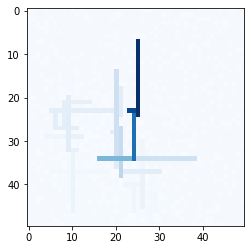

Run: 16
Team: 09edfa93-42be-4c6d-bec0-ef996177e226
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ↓ X ? ? ? ? ? ? ? ? ?

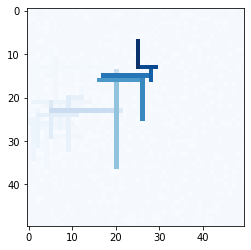

Run: 17
Team: 9505b66e-7880-4043-990f-a653ac42c9d4
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ↓ X ? ? ? ? ? ? ? ? ?

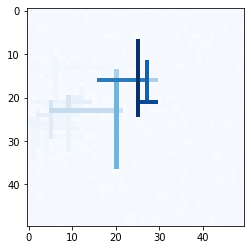

Run: 17
Team: f890a8bb-c38d-42e9-8814-33784c530604
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

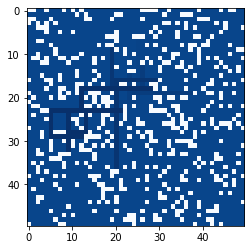

Run: 17
Team: a715c13d-8a02-475f-8c1d-9d3c073841a1
X X ? ? X ? ? ? X ? X ? X ? ? ? ↓ ↓ ↓ ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ↓ X ? ? ↓ ↓ ↓ ? X X ? ? ? ? ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ↓ ↓ X X ? ↓ ↓ ↓ X ? ↓ ? ? ? ? X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → ← ← ← ← ← ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → ↑ ← ← ← ← ↓ ↓ ← ← ← ↑ ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ↑ X ? ? X → → → → → ↓ ↓ ← ← X ↑ → → → → → ↓ X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ↑ ? ? ? ? ↑ ↓ ? ↑ ? ↓ ↓ X X X ↑ ? ? X X X ↓ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → → → → → → ↑ → → ↑ ← ← ↓ ← ← X ↑ ? ? ? G → → ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ↑ ? ? ? ? ↑ ↑ ? ↑ ? X ↓ X X ? ↑ ? ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ← ← ← ← ↑ ↑ ← ← ←

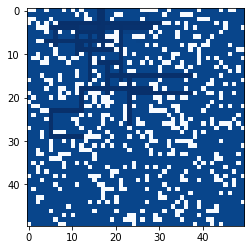

Run: 18
Team: c87505ff-9638-4964-97f8-01314b5c23fe
X X ? ? X ? ? ? X ↓ X ? X ? ? ? ↓ ↓ ↓ ? ? ? ? ↓ ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ↓ ? X ↓ X ? ? ↓ ↓ ↓ ? X X ? ↓ ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ↓ ? ↓ ↓ X X ? ↓ ↓ ↓ X ? ↓ ? ↓ ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ↓ X → → ↓ ← ← ← ↓ ← ← ↓ ↓ ← ← ← ↓ ← ↓ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → → → → → → → → → → ↓ → ↓ ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ↓ ↑ X ? ↓ X → → ↑ → → ↓ ↓ ← ← X ↓ ← ↓ ← ← ← ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

← ← ← ← ← ↓ ↑ ← ← ← ← ← ← ↑ ← ← ← ← X X X ↓ ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → ↑ → → → → → → ↑ ← ← ← ← ← ← X ↓ ? ↓ ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ↑ ? ? ↓ ? ↑ ↑ ↑ ↑ ? X ↓ X X ? ↓ ? ↓ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ← ← ← ← ↑ ↑ ↑ ← ←

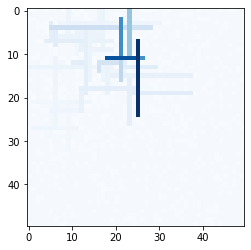

Run: 18
Team: a5fae07e-185a-49fe-a139-f783e339653a
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

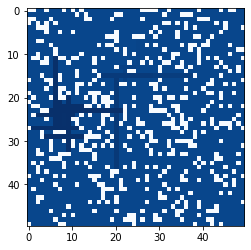

Run: 18
Team: 60837e1c-fb6c-4ccf-89cc-629a30a95460
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ↓ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ↓ ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ↓ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ↓ ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ↓ ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

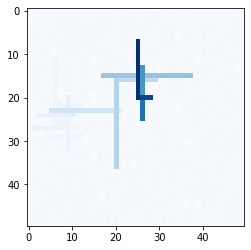

Run: 18
Team: ed5d844e-281a-4da2-a9a7-a76e09419a44
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ↓ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ↓ ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ↓ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ↓ ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ↓ ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

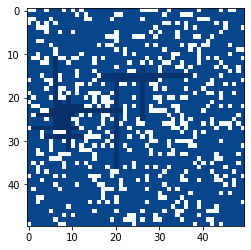

Run: 18
Team: d14768dc-6773-44a1-b477-c86c9f39c7fb
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ↓ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ↓ ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ↓ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ↓ ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ↓ ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

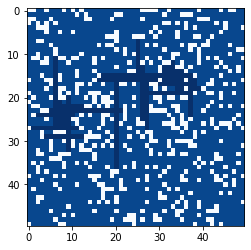

Run: 19
Team: a57c58b6-b278-469a-8de1-26a2f2ae911a
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ↓ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ↓ ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ↓ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ↓ ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ↓ ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

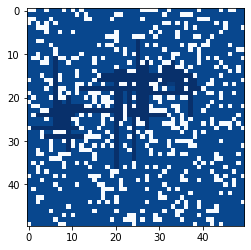

Run: 19
Team: b4f24223-034f-4a0b-9198-ec5e9a4f812e
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

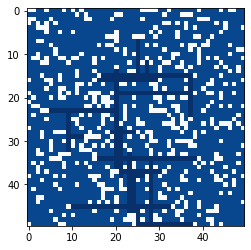

Run: 19
Team: 5c0bc488-3966-4a9b-96bc-b5db9e2c977d
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

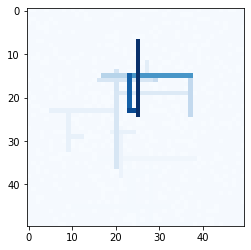

Run: 20
Team: b9a8582e-2966-4b5d-a3e7-225d1977dc30
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

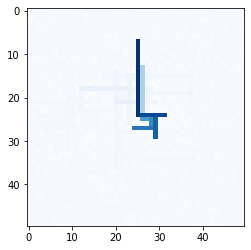

Run: 20
Team: 89b9486c-e4b2-4f9c-8aea-e5f47ec44d34
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

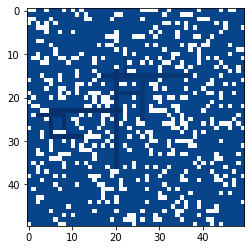

Run: 20
Team: c3b268da-18d2-4ab8-aeff-ca4654ccf74d
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

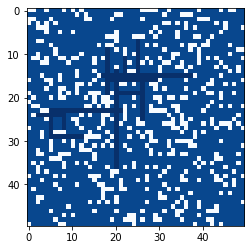

Run: 20
Team: e8417373-a9c7-43d8-a3f4-2b00bedd03db
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

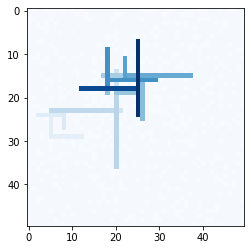

Run: 20
Team: 5557244e-4555-4385-9a8f-7ad5f90b9c8a
X X ? ? X ← ← ↓ X ↓ X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ? ↓ ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X → → → ↓ ← ← ← X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ↑ ? ↓ ? ? ? ↓ ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ← X X X ← ← ↑ ← ↓ ← ← ← ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↑ → ↓ ← X ? ? X ? ↓ X ? ? ↓ ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

↑ → → → → → → → → → → → → ↓ ← ← ← ← X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ← X X ? ? ? ? ? ↓ ? ? ? ↓ ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ↓ ? ? ? ↓ ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ? X ? ? ↓ ? ? ? ↓ ? ?

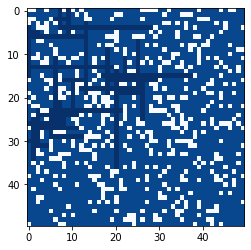

Run: 20
Team: ddcb5a79-3a2b-4529-ba37-f4ddbdabd7b0
X X ? ? X ← ← ↓ X ↓ X ? X → → → → → → → → → ↓ → ↓ ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ? ↓ ? X ↓ X ↑ ← ← ← ← ← X X ↓ → ↓ ← ← ← ← ← ← X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X → → → ↓ ← ↓ ← X X ↓ ← ↑ ← X ↓ ← ↓ ← ← ← X ? ↓ ↑ ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ← X X X → → → → ↑ ← ← ← ← ← ← ← ← ← ↑ ← ← ↓ ← ↑ ← ↑ ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

→ → ↓ ← X ? ? X ? ↑ X → → → → → → → → ↑ X → ↓ → ↑ → ↑ ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → ↑ → ↓ ↑ ← ← ↑ ← ↑ X X X ? ↓ ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ← X X ← ← ← ← ← ↑ ← ↓ ↑ ↑ ← ↑ ← ↑ ← ← X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ↑ ? ↓ ↑ ↑ ↓ ↑ X ↑ X X ? ? ↓ ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ? X → → ↑ → → ↑ → → ↑

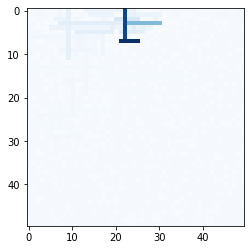

Run: 20
Team: e982acd1-c1b5-4386-9709-2758e493abf6
X X ? ? X ← ← ↓ X ↓ X ? X → → → → → ↓ → → → → → ↓ ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↑ ? ↓ ? X ↓ X → → → → ↓ ← X X → → → → → → ← ← ← X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X → ↑ → ↓ ← ↓ ← X X ↓ ← ↑ ← X ↓ ← ← ← ↑ ← X ? ↓ ↑ ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ ↓ ← ← ↑ ↑ ← ← ← ← ← ↑ ← ← ← ← ↑ ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ← X X X → → ↑ ← ← ← ↓ ← ↓ ← ← ← ↑ ↑ ↑ ← ← ← ← ↑ ← ↑ ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↑ → ↓ ← X ? ? X ? ↓ X → → → → → → ↑ ↑ ← X → → → ↑ → ↑ ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

↑ → → → → → → → → → → → → ↑ ← ↑ ← ↑ X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ← X X ← ← ← ← ← ↓ ← ↓ ↑ ↑ ← ↑ ← ↑ ← ← X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ↓ ? ↓ ↑ ↑ ↓ ↑ X ↑ X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ? X → → → → ↑ → ↑ → ↑

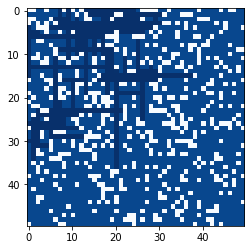

Run: 21
Team: 1baa2d33-851d-4d7f-86a3-4ab365a205b4
X X ? ? X ← ← ↓ X ↓ X ? X → → → → → → → → → → → ↓ ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ? ↓ ? X ↓ X ↑ ← ← ← ← ← X X → → ↓ ← ← ← ← ← ← X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X → → → ↓ ← ↓ ← X X ↓ ← ↑ ↑ X ↓ ← ← ← ← ← X ? ↓ ↑ ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ↑ → ↓ → ↓ → ↓ → → → → → → ← ← ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ← X X X → → ↑ → ↓ ← ↓ ← ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

→ → ↓ ← X ? ? X ? ↓ X ↓ ← ↓ ← ← ← ← ← ← X → → → → → ↑ ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → ↓ → → → ↓ ← ← ← ← X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↑ ← X X ← ← ← ← ← ↓ ← ↓ ↑ ↓ ← ↑ ← ↑ ← ← X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↑ ? ? ? ? X ? ? ? ↓ ? ↓ ↑ ↓ ↓ ↑ X ↑ X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↑ ? ? ? ? ? X → → → → → → → → →

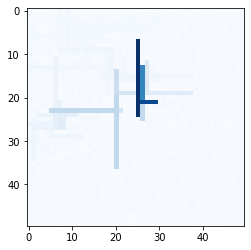

Run: 21
Team: 68e83a1e-0b0a-4608-912a-f7f11d0df5fd
X X ? ? X ? ? ↓ X ↓ X ? X ? ? ↓ ↓ ? ? ? ? ? ? ↓ ? ↓ X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ↓ ↓ ↓ X ↓ X ← ↓ ← ← ← ← X X ? ↓ ? ↓ ? ? ↓ ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ↓ ↓ ↓ ↓ ? ↓ X X ↓ ↑ ? ? X ↓ ? ? ↓ ? ↓ X ? ↓ ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → ↑ ← ← ← ← ← ← ↑ ↓ ← ← ← ← ↑ ← ← ↓ ← ↑ ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↑ ↓ X ← ↓ ← ↑ ↑ ↑ ← ← ← X ? ? ↓ ? ↑ ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → ↑ → → → ↓ ← ↑ ↑ ↑ ← X X X ? ? ↓ X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ← ← ← ↓ ↑ ↓ ↓ ← ↓ ← ↑ ↑ ← ← ← ← X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ↓ ↑ ↓ ↓ ? ↓ ? ↑ ↑ X ? X X ? ? ? ↓ ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ↓ X → → → → → → → ↑ ↑

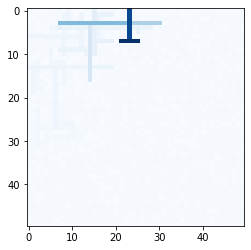

Run: 21
Team: 7cccf1c2-496a-4de3-8a01-2739a0e46de3
X X ? ? X ? ? ↓ X ↓ X ? X ? ? ↓ ↓ ? ? ? ? ? ? ? ? ↓ X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ↓ ↓ ↓ X ↓ X ← ↓ ← ← ← ← X X ? ? ? ↓ ? ? ↓ ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ↓ ↓ ↓ ↓ ↓ ↓ X X ↓ ↑ ? ? X ↓ ↓ ? ? ? ↓ X ? ↓ ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → → → ↓ ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → ↑ → ↑ → → ↓ → ↓ ↑ ↑ → → → ↑ ↓ → → → ↑ ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ↑ ↑ X ↓ ↓ ↓ ↓ ↑ ↑ ← ← ← X ↓ ? ? ? ↑ ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → ↑ → → ↓ ↓ ↓ ↑ ↑ ← X X X ↓ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ↑ ↑ ? ↓ ↓ ↓ ↓ ↑ ↑ ? ? ? X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → → → ↑ ← ← ← ← ← ↑ X ? X X ? ↓ ? ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ↓ X → → ↑ → → → → ↓ ↑

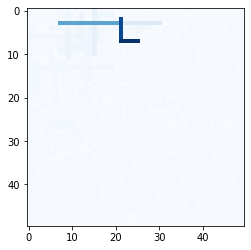

Run: 21
Team: 81316fb9-23c3-407f-9d3c-66faf5b2dbe3
X X ? ? X ? ? ↓ X ↓ X ? X ← ← ↓ ↓ ↓ ← ← ← ← ← ← ← ↓ X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ↓ ↓ ↓ X ↓ X ← ↓ ↓ ↓ ← ← X X ? ? ? ↓ ? ? ↓ ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ↓ ↓ ↓ ↓ ↓ ↓ X X ↓ ↓ ↓ ? X ↓ ↓ ? ? ? ↓ X ? ↓ ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → ↓ ← ↓ ← ↓ ↓ ← ↓ ↓ ← ← ← ↓ ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → ↓ → ↓ ↓ ← ← ← ← ← ← ↓ ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ↑ X ↓ ↓ X ↓ ↓ ↓ ↓ ↑ ↓ ↓ ← ← X ↓ ? ? ? ↑ ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → ↑ → → → → ↓ → ↓ ↓ ← ← ↓ X X X ↓ ← ← X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ← ← ↑ ← ↑ ↑ ← ↓ ↓ ↓ ↓ ↑ ↑ ↓ ← ← X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ↑ ← ← ← ← ↓ ← ← ↓ ← X ↓ X X ? ↑ ? ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ↓ X → → → → → → ↓ ↓ ←

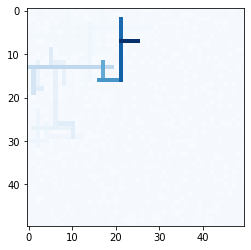

Run: 22
Team: 8a5454b0-117e-4b10-b119-cff780192f56
X X ? ? X ? ? ↓ X ↓ X ? X ← ← ↓ ↓ ↓ ← ← ← ← ← ← ← ↓ X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ↓ ↓ ↓ ↓ X ↓ X ← ↓ ↑ ← ← ← X X ? ? ? ↓ ? ? ↓ ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ← ↓ ↓ ↓ ↓ ↓ ↓ X X ↓ ↑ ↓ ? X ↓ ↓ ? ? ? ↓ X ? ↓ ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → → → → → → ← ← ↓ ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X → → → → → → → ← ← ← ← ← ← ← ← ← ↓ ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ↑ X ↑ ↓ X ↑ ↓ ↑ ↑ ↑ ↑ ↑ ← ← X ↓ → → → ↑ ← ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → ↑ ← ← ↑ ← ← ← ↑ ↑ ↑ X X X ↓ ← ← X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X → → ↑ ↓ ↑ ↑ ← ↑ ↓ ↑ ↑ ↑ ↑ ↑ ← ← X ↑ ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X → → ↑ ↑ → ↑ → ↑ ↑ ↑ X ↑ X X ← ↑ ← ← ← ↓ ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ↓ X → ↑ ↑ → ↑ ↑ ↑ ↑ ↑

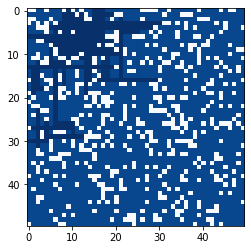

Run: 22
Team: eadbc999-dbe1-46ea-ad6c-343d39937fee
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

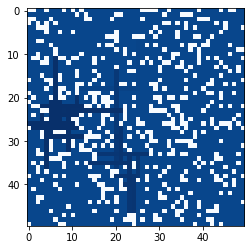

Run: 23
Team: fc16ac0c-b344-46fe-bb95-7e9a6588ef53
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ↓ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ↓ ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ↓ ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ↓ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ↑ ? ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

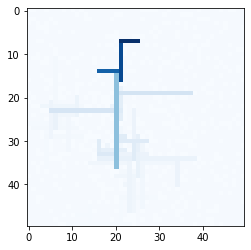

Run: 23
Team: 10e528d1-d397-44ed-8d21-1b8647ad640f
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

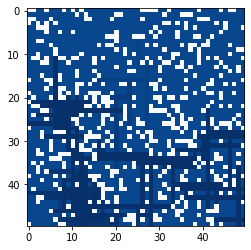

Run: 23
Team: ae19a980-cc48-4319-ac47-b10db452d7cd
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

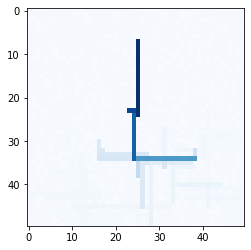

Run: 23
Team: da3c31b8-f05f-4d18-b8c3-a1a0cc7b5d5b
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

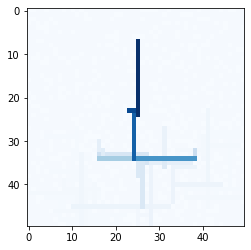

Run: 24
Team: 13972fd2-9c8a-49c4-90d7-7053d10d6330
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

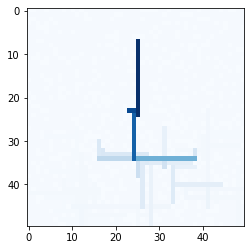

Run: 25
Team: a6eb21ea-60fa-4617-a582-c12717e3f06c
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ? ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ? ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? X ? X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X ? ? ? ? ? ? ? ? ?

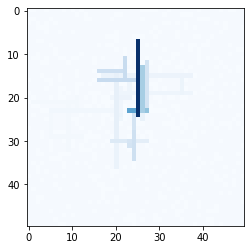

Run: 25
Team: c3528ed5-3299-4fbe-ac04-c01e7ce241ec
X X ? ? X ? ? ? X ? X ? X ? ? ? ? ↓ ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ? X ? X ? ? ? ↓ ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ? ? ? X X ? ? ↓ ? X ? ↓ ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X ? ? ? ? ? ? ? ↓ ? ? ↓ ? ? ? ↓ ? ? ? ? ? ? ? ? ? X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ? X X X ? ? ? ? ? ? ? ? ? ↓ ? ? ↓ ? ? ? ↓ ? ? ? ? ? ? ? X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ? ? ? X ? ? X ? ? X ? ? ? ↓ ? ? ↓ ? ? X ↓ ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → → → → → ↓ X X X ↓ ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ? X X ? ? ? ? ? ? ? ? ? ? ↑ ? ? ↓ ? ? X → → → → G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ? ? ? ? X ? ? ? ? ? ? ? ? ↑ ? X ↓ X X ? ↑ ? ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ? ? ? ? ? X → → → → → → → → →

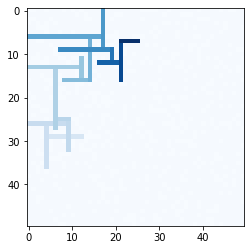

Run: 25
Team: 4e5a1a45-5476-4fff-9d16-8744b8ae6aa9
X X ? ? X ? ? ? X ↓ X ? X ? ? ↓ ↓ ↓ ? ? ? ? ↓ ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ↓ ? X ↓ X ? ↓ ↓ ↓ ? ? X X ↓ ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ↓ ? ? ↓ X X ↓ ↓ ↓ ? X ? ? ↓ ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ↓ X ? X ? X → → → → → → ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

? ↓ X X X → → → → → → → → ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

? ↓ ? ? X ? ? X ? ↑ X ? ↑ ↓ ↓ ↓ ↓ ↑ ? ? X ? ↓ ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → ← ← ← ↓ ← ← ← ← X X X ? ↓ ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

? ↓ X X ? ? ? ↓ ? ↑ ↓ ? ↑ ↓ ↓ ↓ ↓ ↑ ? ? X ? ← ← ← G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

? ↓ ? ? ? X → ↓ → → ↓ → → ↓ ↓ ← X ↑ X X ? ? ↓ ? ? ? ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

? ↓ ? ? ? ? X → → → → → → ↑ ← ←

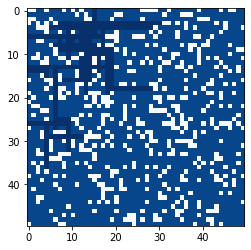

Run: 25
Team: b5d16b5d-d11e-4374-a8ce-53a14eb38939
X X ? ? X ? ? ? X ? X ? X ? ? ↓ ↓ ↓ ? ? ? ? ? ? ? ? X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ↓ X ? X ? ↓ ↓ ↓ ? ? X X ? ? ? ? ? ? ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ↓ ? ? X X ↓ ↓ ↓ ? X ? ? ? ? ? ? X ? ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X ← ← ← ← ← ← ← ← ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X ? ? ↓ ↓ ↓ ↓ ↑ ? ? X ? ? ? ? ? ? ? X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → ↓ ↓ → → ↑ X X X ? ? ? X X X ? ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↓ ? X X ? ? ? ↓ ? ? ↓ ? ? ↓ ↓ ↓ ↓ ↑ ? ? X ? ? ? ? G ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↓ ? ? ? ? X ← ↓ ← ← ↓ ← ← ↓ ↓ ↓ X ↑ X X ? ? ? ? ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↓ ? ? ? ? ? X → → → → → → ↓ ↓ ←

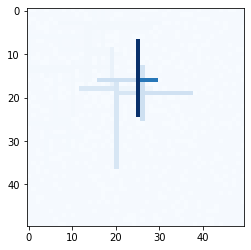

Run: 25
Team: 9edc0004-bb4d-404b-a465-9c0c56255174
X X ? ? X ? ? ? X ? X ? X → → → ↓ ↓ → → → → ↓ ↓ ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ↓ X ? X ← ↓ ↓ ↓ ← ← X X ↓ ↓ ↓ ↓ ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ↓ ? ? X X ↓ ↓ ↓ ? X ↓ ↓ ↓ ↓ ↓ ↓ X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ → → → → → → → ↓ → ↓ ← ← ← ↓ ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X → → → → → → → → ↓ → → → → → → ↑ ↓ → ↓ ← ← ← ↓ ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X → → ↓ → → → → → ↑ X ↓ ← ↓ ← ← ← ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → ↓ → → ↓ ← ← ↓ ← ← ← ← X X X ↓ ← ← X X X ↑ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↓ ? X X ? ? ? ↓ ? ? ↓ ? ? ↓ ↓ ↑ ↑ ↑ ? ? X ↓ ↓ ↑ ? G ? ↑ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↓ ? ? ? ? X ← ↓ ← ← ↓ ← ← ↓ ↓ ↑ X ↑ X X → → → → → ↑ ← X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↓ ? ? ? ? ? X → → → → → → ↓ → →

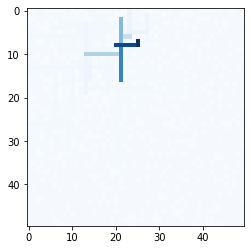

Run: 25
Team: 7508cb58-8480-41e1-b33b-66212a056bf6
X X ? ? X ? ? ? X ? X ? X → → ↓ ← ← ← ← ← ← ← ↓ ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ↓ X ? X ← ↓ ↓ ← ← ← X X ↓ ↓ ↑ ↓ ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ↓ ? ? X X ↓ ↓ ↓ ? X ↓ ↓ ↓ ↓ ↑ ↓ X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → ↓ → → → ← ← ← ← ← ↓ ↑ ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X → → → → → → → → → ↓ ↑ ↓ ↑ → → ↑ → → ↓ ↑ → → ↑ ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X → → ↓ ↓ ↑ ↓ ↑ → ↑ X ↑ ← ↓ ← ← ← ↑ X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

↓ → → → → → → ↓ → → ↓ → → ↓ ↑ ↑ ← ↑ X X X ↑ ← ↑ X X X ↑ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↓ ? X X ? ? ? ↓ ? ? ↓ ? ? ↑ ↑ ↑ ↑ ↑ ? ? X ↑ ↓ ↑ ? G ? ↑ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↓ ? ? ? ? X ← ↓ ← ← ↓ ← ← ↑ ↑ ↑ X ↑ X X ? ↑ ↓ ↑ ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↓ ? ? ? ? ? X → → → → → → ↑ → ←

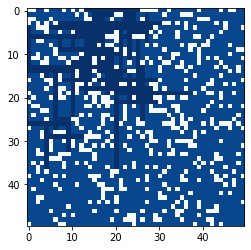

Run: 25
Team: 358a09bb-e081-4291-a570-5d48e94ec6aa
X X ? ? X ? ? ? X ? X ? X → → → → → → → → → ↓ ↓ ↓ ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ↓ X ? X ← ↓ ↓ ↓ ← ← X X ↓ ↑ ↓ ↓ ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ↓ ? ? X X ↓ ↓ ↓ ? X ↓ ↓ ↓ ↑ ↓ ↓ X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → → ↓ → → ↓ ← ← ← ← ↓ ↑ ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X → → → → → → → → ↓ ↓ ↑ ↓ ↑ → → ↑ ← ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X → → → ↓ → → → → ↑ X ↑ ← ↑ ← ← ← ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → → ↓ ← ← ← X X X ↑ ← ↑ X X X ↑ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↓ ? X X ? ? ? ↓ ? ? ↓ ? ? ↓ ↓ ↑ ↑ ↑ ? ? X ↑ ↓ ↑ ? G ? ↑ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↓ ? ? ? ? X ← ↓ ← ← ↓ ← ← ↓ ↓ ↑ X ↑ X X ? ↑ ↓ ↑ ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↓ ? ? ? ? ? X → → → → → → ↑ ← ←

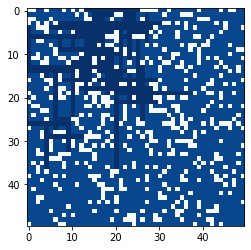

Run: 25
Team: 1d6f128b-08c3-4658-bc13-7ee602bbd7b8
X X ? ? X ? ? ? X ? X ? X → → ↓ ← ← ← ← ← ← ← ← ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ↓ X ? X ← ↓ ↓ ← ← ← X X ↓ ↑ ↑ ↓ ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ↓ ? ? X X ↓ ↓ ↓ ? X ↓ ↓ ↓ ↑ ↑ ↓ X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ ↓ ↓ ↓ ← ← ← ← ← ← ← ↑ ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X → → → → → → → → → ↓ → ↓ ↑ → → ↑ ← ← ← ↑ ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X → → ↓ ↓ ↓ ↓ ↑ → ↑ X ↑ ← ↑ ↑ ← ← ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → → → → → → → → → → ← ← X X X ↑ ← ← X X X ↑ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↓ ? X X ? ? ? ↓ ? ? ↓ ? ? ↓ ↓ ↑ ↑ ↑ ? ? X ↑ ↓ ↑ ? G ? ↑ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↓ ? ? ? ? X ← ↓ ← ← ↓ ← ← ↓ ↓ ↑ X ↑ X X ? ↑ ↓ ↑ ? ↓ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↓ ? ? ? ? ? X → → → → → → ↓ ↓ ←

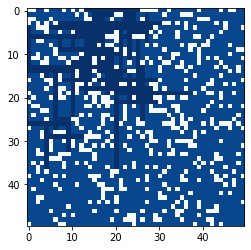

Run: 25
Team: 3b217544-cc47-499b-ab4d-c439687b9303
X X ? ? X ? ? ? X ? X ? X → → ↓ ↓ ↓ ← ← ← ← ↓ ← ↓ ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ↓ X ? X ← ↓ ↓ ↓ ← ← X X ↓ ↑ ↓ ↓ ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ↓ ? ? X X ↓ ↓ ↓ ? X ↓ ↓ ↓ ↑ ↓ ↓ X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ ↓ ↓ ← ↓ ← ← ← ← ↓ ← ↓ ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X → → → → → → → → ↓ ↓ → → → → → → → → → ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X → → ↓ ↓ → → → → ↑ X ↑ ← ↑ ↑ ← ← ↑ X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

↓ → → → → → → ↓ → → ↓ → → ↓ ↓ ← ← ← X X X ↑ ← ← X X X ↑ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↓ ? X X ? ? ? ↓ ? ? ↓ ? ? ↓ ↓ ↑ ↑ ↑ ? ? X ↑ ↓ ↑ ? G ? ↑ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↓ ? ? ? ? X ← ↓ ← ← ↓ ← ← ↓ ↓ ↑ X ↑ X X ? ↑ ↓ ↑ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↓ ? ? ? ? ? X → → → → → → ↓ → →

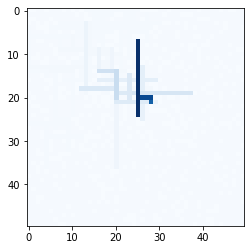

Run: 25
Team: f16e3ba7-2155-49df-9929-4b55415008dc
X X ? ? X ? ? ? X ? X ? X → → ↓ ← ↓ ← ← ← ← ← ← ↓ ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ↓ X ? X ← ↓ ↓ ↓ ← ← X X ↓ ↑ ↓ ↓ ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ↓ ? ? X X ↓ ↓ ↓ ? X ↓ ↓ ↓ ↑ ↓ ↓ X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ ← ← ← ← ← ← ← ← ← ← ↓ ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X → → → → → → → → ↓ ↓ → → → → → → → → → ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X → → ↓ ↓ → → ↑ → ↑ X ↑ ← ↑ ↑ ← ← ← X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

→ → → → → → → ↓ → → ↓ → → ↓ ↓ ← ← ↑ X X X ↑ ← ↑ X X X ↑ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↓ ? X X ? ? ? ↓ ? ? ↓ ? ? ↓ ↓ ↑ ↑ ↑ ? ? X ↑ ↓ ↑ ? G ? ↑ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↓ ? ? ? ? X ← ↓ ← ← ↓ ← ← ↓ ↓ ↑ X ↑ X X ? ↑ ↓ ↑ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↓ ? ? ? ? ? X → → → → → → → → →

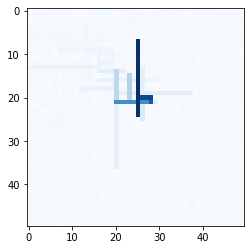

Run: 25
Team: e290edcd-a5e0-480f-98fc-4aba7e5b6122
X X ? ? X ? ? ? X ? X ? X → → ↓ ↓ ↓ → → → → ↓ ← ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ? ? X ? X X ? ? 

? ? ? ? ? ? ? ? ? ? ↓ X ? X ← ↓ ↓ ↓ ← ← X X ↓ ↑ ↓ ↓ ? ↓ ? ? ? X ? ? ? X X X ? ? ? ? ? ? ? ? ? ? ? ? 

X X ? ? ? X ? ? ? ? ↓ ? ? X X ↓ ↓ ↓ ? X ↓ ↓ ↓ ↑ ↓ ↓ X ↓ ? ? ? ? ? ? ? ? ? ? ? X X X ? ? ? ? ? ? ? ? 

X ? X ? X ? X → → → → → → ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X X ? X ? X ? ? ? ? ? ? X ? X ? ? ? ? 

↓ ? X X X → → → → → → → → ↓ ↓ ← ← ← ← ← ← ← ← ← ← ← ← ← ← X ? ? ? ? ? ? X ? X ? ? ? ? ? ? X ? ? ? X 

↓ ? ? ? X ? ? X ? ? X → → ↓ ↓ ↓ ↑ ↑ → ↑ X ↑ ← ↑ ↑ ← ← ↑ X ? X ? ? ? X ? ? ? ? ? ? ? ? ? X ? ? ? ? ? 

↓ → → → → → → ↓ → → ↓ → → ↓ ↓ ← ← ← X X X ↑ ← ↑ X X X ↑ ? X ? ? ? ? X ? ? ? X X ? ? X ? ? ? ? ? ? ? 

↓ ? X X ? ? ? ↓ ? ? ↓ ? ? ↓ ↓ ↑ ↑ ↑ ? ? X ↑ ↓ ↑ ? G ? ↑ ? ? ? ? ? ? ? ? ? ? ? ? ? X ? ? ? ? ? ? ? ? 

↓ ? ? ? ? X ← ↓ ← ← ↓ ← ← ↓ ↓ ↑ X ↑ X X ? ↑ ↓ ↑ ? ↑ ? X ? X ? ? ? ? ? X ? X X ? X X ? ? ? ? X ? ? ? 

↓ ? ? ? ? ? X → → → → → → ↓ ↓ →

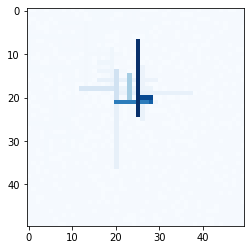

In [6]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

for run in range(runs):
    for team in run_winners[run]['winners']:

        print(f'Run: {run}')
        print(f'Team: {team.id}')
        
        region_action_scores = []
        for learner in team.learners:
            if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
                region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
            else:
                region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

        sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)
        # print(sorted_region_action_scores)
        # for record in sorted_region_action_scores:
        #     print(record)
        action_states = []
        for record in sorted_region_action_scores:
            action = ''
            if record['action'] == 0:
                action = '\u2191'
            elif record['action'] == 1:
                action = '\u2193'
            elif record['action'] == 2:
                action = '\u2192'
            elif record['action'] == 3:
                action = '\u2190'

            for i in range(record['region'][3] - record['region'][2]+1):
                state = [0, 0]
                state[record['region'][0]] = record['region'][1]
                state[not record['region'][0]] = record['region'][2] + i
                for cumulative in superimpose:
                    if cumulative['state'] == (state[0], state[1]):
                        if action == '\u2191':
                            cumulative['action_count'][0] += record['q']
                        elif action == '\u2193':
                            cumulative['action_count'][1] += record['q']
                        elif action == '\u2192':
                            cumulative['action_count'][2] += record['q']
                        elif action == '\u2190':
                            cumulative['action_count'][3] += record['q']
                
                # ensure we do not enter duplicate states
                found = 0
                for pair in action_states:
                    if pair['state'] == (state[0], state[1]):
                        found = 1

                if found == 0:
                    action_states.append({'state': (state[0], state[1]), 'action': action, 'q': record['q'] })

        # add in the rest of the states, either they are not visited, or illegal
        for n in reversed(range(env.rows)):
            for m in range(env.cols):
                action = ''
                found = 0
                for record in action_states:
                    if record['state'] == (n, m):
                        found = 1
                        action = record['action']
        #                 action = float(round(record['q'], 0))
                if found == 0:
                    if not env.check_legal((n, m)):
                        action = 'X'
                    else:
                        action = '?'
                if (n, m) == env.start_state:
                    action = 'S'
                if (n, m) == env.win_state:
                    action = 'G'
                print(f'{action} ', end='')
            print('\n')

        q_map = np.zeros((env.rows, env.cols))

        # add in the rest of the states, either they are not visited, or illegal
        for n in range(env.rows):
            for m in range(env.cols):
                action = ''
                found = 0
                for record in action_states:
                    if record['state'] == (n, m):
                        found = 1
                        action = record['q']
                if found == 0:
                    if not env.check_legal((n, m)):
                        action = -1
                    else:
                        action = 0
                q_map[(env.rows-1)-n][m] = action

        plt.imshow(q_map, cmap='Blues', interpolation='nearest')
        if (load == False):
            plt.savefig(f'qtpg/qmaps/{plotName}/{team.id}_qmap.png')
        plt.show()

#         x = []
#         y = []
#         for i in range(env.cols):
#             x.append(i)
#             y.append(i)

#         Y, X = np.meshgrid(x, y)

#         fig = plt.figure()

#         # syntax for 3-D plotting
#         ax = plt.axes(projection ='3d')

#         # syntax for plotting
#         ax.plot_surface(X, Y, q_map, cmap ='viridis', edgecolor ='green')
#         ax.set_title(f'Surface plot for {envName}')
#         plt.show()

In [7]:
actionables = []

# add in the rest of the states, either they are not visited, or illegal
for n in reversed(range(env.rows)):
    for m in range(env.cols):
        action = ''
        for record in superimpose:
            if record['state'] == (n, m):
                chosen_counts = 0
                for i in range(len(record['action_count'])):
                    if record['action_count'][i] > chosen_counts:
                        chosen_counts = record['action_count'][i]
                        if i == 0:
                            action = '\u2191'
                        elif i == 1:
                            action = '\u2193'
                        elif i == 2:
                            action = '\u2192'
                        elif i == 3:
                            action = '\u2190'
                    if chosen_counts == 0:
                        action = '?'
                    if not env.check_legal((n, m)):
                        action = 'X'
#                     if (n, m) == env.start_state:
#                         action = 'S'
                    if (n, m) == env.win_state:
                        action = 'G'
                if action != '?' and action != 'X' and action != 'G':
                    actionables.append({ 'state': (n, m), 'action': action, 'win': False })
                elif action == 'G':
                    actionables.append({ 'state': (n, m), 'action': action, 'win': True })
        
        if (n, m) == env.start_state:
            print('S ', end='')
        else:
            print(f'{action} ', end='')
    print('\n')

states = []
for actionable in actionables:
    states.append(actionable['state'])
    
win_count = 0
for actionable in actionables:
    cancel = 0
    memory = []
    start = actionable['state']
    curr = actionable
    while cancel == 0:
        if curr['action'] == '\u2191':
            state = (curr['state'][0]+1, curr['state'][1])
        elif curr['action'] == '\u2193':
            state = (curr['state'][0]-1, curr['state'][1])
        elif curr['action'] == '\u2192':
            state = (curr['state'][0], curr['state'][1]+1)
        elif curr['action'] == '\u2190':
            state = (curr['state'][0], curr['state'][1]-1)

        if state in memory:
            cancel = 1
        else:
            memory.append(state)
        
        if state == env.win_state:
            win_count += 1
            cancel = 1
    
        found = 0
        for actionable in actionables:
            if state == actionable['state']:
                curr = actionable
                found = 1
        if found == 0:
            cancel = 1

print(f'number of actionable cells: {len(actionables)}')
print(f'number of actionable cells that lead to goal: {win_count}')
print(f'% of actionable cells that lead to goal overall: {win_count / len(actionables) * 100} %')

X X ? ? X ? ? ↓ X ↓ X ? X → → ↓ ↓ ↓ ← ← ← ← ↓ ↓ ← ← X X X X ? ? X ? ? ? ? ? ? X ? ? ↓ ↓ X ? X X ↓ ↓ 

? ? ? ? ? ? ? ↓ ↓ ↓ ↓ X ↓ X ↑ ↓ ↓ ↓ ← ← X X ↓ ↓ → → → ↓ ↓ ← ← X ? ? ? X X X → → → → → → → → → ↓ ← ← 

X X ? ? ? X → ↓ ↓ ↓ ↓ ↓ ↓ X X ↓ ↓ ↓ ← X ↓ ↓ ↓ ↓ ← ← X ↓ ↓ ↑ → → → → → ↓ ? ? ? X X X → → → → → ↓ ↑ ↑ 

X ? X ? X ↓ X → → → → → → → → → → → → → → → → ← ← ← ← ← ← ← ← X X ? X ↓ X ? ? ? ↓ ? ↑ X ? X → ↓ ↑ ↑ 

↓ ? X X X → → → → → → → → → → → → → → → → ↓ ↓ ↓ ← ← ← ← ← X ? ? ↓ ← ← ← X ? X ? ↓ ? ↑ ? ? X ↓ ↓ ↑ X 

↓ → ↓ ? X ↓ ↓ X ↑ ↑ X → ↑ ↓ ↓ ↓ ↑ ↓ → ↑ X ↓ ↓ ↓ ← ← ← ↓ X ? X ? ↓ ? X → → → → → ↓ ← ← ← X ? ↓ ↓ ↑ ? 

→ → → → → → → → → → → → ↑ ↓ → → ↑ ↓ X X X ↓ ↓ ↓ X X X ↓ ? X ? ? ↓ ? X ? ↓ ? X X ↓ ? X ↑ ↓ ← ← ← ← ← 

↑ ? X X → → → → → → → → ↑ ↓ ← ← ← ← ← ← X → → → → G ← ← ← ← ← ← ← ← ← ← ← ← ← ← ← X ↓ ↑ ↓ → ↑ ↑ ↑ ? 

↑ ? ? ? ? X → → ↑ ↑ ← ← ↑ ↑ ← ← X ↓ X X → ↑ ↑ ↑ → ↑ ← X ? X ? ? ↓ ? ↓ X ↓ X X ? X X ↓ ↑ ← ← X ↑ ↑ ? 

↑ ? ? ? ? ↓ X → ↑ ↑ → → ↑ ↑ ↑ ↑ → → ↓ ↓ X ↑ X ↑ → ↑ → → → ↓ ← X → → → → ↓ X ↓ X ? 

In [8]:
query_average = 0
if load == False:
    for query_total in gp_query_runs:
        query_average += query_total
    query_average /= len(gp_query_runs)
else:
    for query_total in loadedQueryTotals:
        query_average += query_total
    query_average /= len(loadedQueryTotals)

print(f'Average query total: {query_average}')
loss_count = 0
for attempt in win_loss:
    if attempt == False:
        loss_count += 1
print(f'RL Runs: {len(win_loss)}')
print(f'Loss Count: {loss_count}')
print(f'Win Count: {len(win_loss) - loss_count}')
print(f'Win Ratio: {(len(win_loss) - loss_count) / len(win_loss)} --> {((len(win_loss) - loss_count) / len(win_loss)) * 100}%')

Average query total: 6190.533333333334
RL Runs: 114
Loss Count: 47
Win Count: 67
Win Ratio: 0.5877192982456141 --> 58.77192982456141%
